# Capstone Project - NBA MVP Predictor Project

# Final Project Submission
Please fill out:

- Student name: Troy Hendrickson
- Student pace: Full time
- Scheduled project review date/time: January 6th, 2023
- Instructor name: Joseph Mata
- Blog post URL: https://troykhendrix22.blogspot.com/

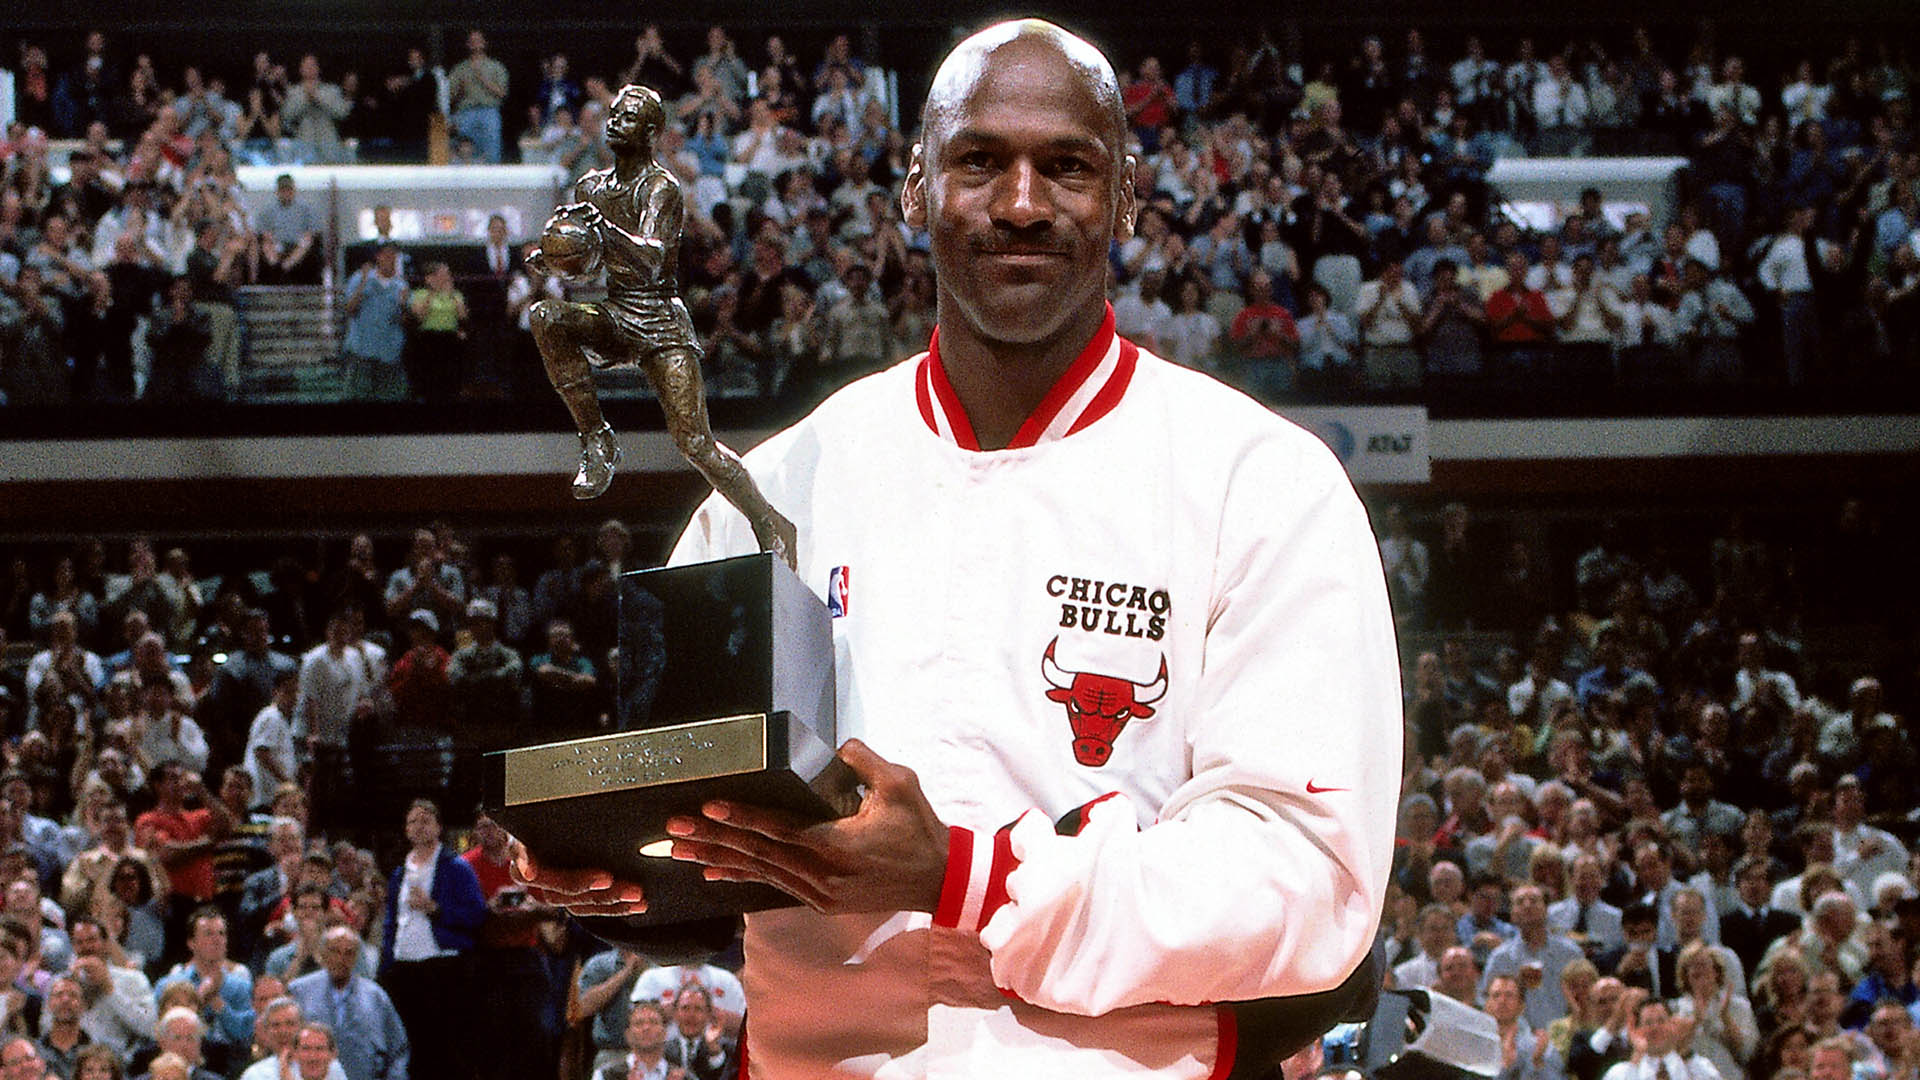

# Overview

This project analyzes existing data about various individuals - some who have been an NBA MVP(most valuable player), and many who have not. To be an MVP in the NBA is easily one of the most challenging individual accomplishments. Voting for MVP is never easy, though some years there are more clear winners than others. And yet, there are also times when a player might seem like an obvious choice for MVP but he still doesn’t win the award.  We use this data in order to develop a predictive model that can aid a stakeholder, The NBA MVP voting panel, in determining whether or not a player should be MVP based on stats. Although this data does not specifically discuss a players specific team success, advanced stats are being taken into effect to evaluate how the game is played today and what attributes coaches and teams deem to be valuable to win nowadays. After utilizing the process of exploratory data analysis, we create several classification models to eventually reach the model with the highest and most appropriate recall.

# Business Problem

Until the 1979–80 season, the MVP was selected by a vote of NBA players. Since the 1980–81 season, the award is decided by a panel of sportswriters and broadcasters throughout the United States and Canada. Each member of the voting panel casts a vote for first to fifth place selections. Unless there is a unanimous MVP which has only happened once when Stephen Curry won the award in 2015-16, the voting process can be very scrutinized amongst the league among players, coaches, and team officials. The goal here is to create a model that can output the player who is most worthy of the award without any second guessing. 

# Data Understanding

The data that I used for this project comes from a dataset from FiveThirtyEight titled, 'The Best NBA Players, According To RAPTOR' and also a data set from Kaggle titled 'NBA MVP Predictor Dataset'. This source is comprised of advanced stats that go beyond the box score and takes into effect the pace of the game, spacing, and the offensive and defensive nuances of the game. This gives stats of all players dating back to 2013 and takes into account of players who have been MVP and who has not. 

# Load Imports

In [291]:
#Basics
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")
import pickle

# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_roc_curve
%matplotlib inline
from sklearn.metrics import recall_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy


# Metrics
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [292]:
# Load in first data set that includes target variable
df1 = pd.read_csv('Data/NBA_MVP_Predictor_Dataset_2013_2022.csv', index_col=0)
df1.head()

,names,pts,ast,reb,wins,total_games,win_pct,year,mvp,is_mvp
1,Aaron Brooks,7.094340,2.150943,1.509434,20,53,0.377358,2013,0,NO
2,Aaron Gray,2.833333,0.785714,3.166667,14,42,0.333333,2013,0,NO
3,AJ Price,7.736842,3.596491,2.000000,21,57,0.368421,2013,0,NO
4,Al-Farouq Aminu,7.302632,1.355263,7.697368,25,76,0.328947,2013,0,NO
5,Al Harrington,5.100000,1.000000,2.700000,3,10,0.300000,2013,0,NO


In [293]:
# Load in second data set that has current stats up until November 10th
# Will use this as test data
nba2 = pd.read_csv('Data/NBA_MVP_Predictor_Dataset_2023_November_10th.csv', index_col=0)
nba2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 1 to 449
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   names        449 non-null    object 
 1   pts          449 non-null    float64
 2   ast          449 non-null    float64
 3   reb          449 non-null    float64
 4   wins         449 non-null    int64  
 5   total_games  449 non-null    int64  
 6   win_pct      449 non-null    float64
 7   year         449 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 31.6+ KB


In [294]:
# Load in third data set that has advanced stats 
df3 = pd.read_csv('Data/modern_RAPTOR_by_team.csv')
df3.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,PO,OKC,172,80,0.420828,-2.862454,-2.441626,-6.183824,-19.474686,-25.658510,-0.892617,-6.561258,-7.453875,-0.198700,0.000000,-0.198700,-3.298178,-6.535113,-9.833292,0.334678
1,Alex Abrines,abrinal01,2017,RS,OKC,2215,1055,0.770717,-0.179621,0.591096,0.029134,-2.644262,-2.615128,0.654933,-0.724233,-0.069300,1.447708,1.447708,0.000000,0.339201,-0.611866,-0.272665,0.325771
2,Alex Abrines,abrinal01,2018,PO,OKC,233,110,1.123761,-1.807486,-0.683725,4.965907,10.916521,15.882428,1.875157,0.740292,2.615450,0.311392,0.000000,0.311392,2.877519,-0.520954,2.356566,0.260479
3,Alex Abrines,abrinal01,2018,RS,OKC,2313,1134,0.236335,-1.717049,-1.480714,-1.922090,-1.154375,-3.076465,-0.211818,-1.728584,-1.940401,0.465912,0.465912,0.000000,-0.482078,-1.172227,-1.654306,-0.528330
4,Alex Abrines,abrinal01,2019,RS,OKC,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,-1.257688,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013


Column | Description
-------|---------------
`player_name` |	Player name
`player_id` |	Basketball-Reference.com player ID
`season` |	Season
`season_type` |	Regular season (RS) or playoff (PO)
`team` |	Basketball-Reference ID of team
`poss` |	Possessions played
`mp` |	Minutes played
`raptor_box_offense` |	Points above average per 100 possessions added by player on offense, based only on box score estimate
`raptor_box_defense` |	Points above average per 100 possessions added by player on defense, based only on box score estimate
`raptor_box_total` |	Points above average per 100 possessions added by player, based only on box score estimate
`raptor_onoff_offense` |	Points above average per 100 possessions added by player on offense, based only on plus-minus data
`raptor_onoff_defense` |	Points above average per 100 possessions added by player on defense, based only on plus-minus data
`raptor_onoff_total` |	Points above average per 100 possessions added by player, based only on plus-minus data
`raptor_offense` |	Points above average per 100 possessions added by player on offense, using both box and on-off components
`raptor_defense` |	Points above average per 100 possessions added by player on defense, using both box and on-off components
`raptor_total` |	Points above average per 100 possessions added by player on both offense and defense, using both box and on-off components
`war_total` |	Wins Above Replacement between regular season and playoffs
`war_reg_season` |	Wins Above Replacement for regular season
`war_playoffs` |	Wins Above Replacement for playoffs
`predator_offense` |	Predictive points above average per 100 possessions added by player on offense
`predator_defense` |	Predictive points above average per 100 possessions added by player on defense
`predator_total` |	Predictive points above average per 100 possessions added by player on both offense and defense
`pace_impact` |	Player impact on team possessions per 48 minutes

# Exploratory Data Analysis/ Data Cleaning 

In [295]:
df3.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,PO,OKC,172,80,0.420828,-2.862454,-2.441626,-6.183824,-19.474686,-25.658510,-0.892617,-6.561258,-7.453875,-0.198700,0.000000,-0.198700,-3.298178,-6.535113,-9.833292,0.334678
1,Alex Abrines,abrinal01,2017,RS,OKC,2215,1055,0.770717,-0.179621,0.591096,0.029134,-2.644262,-2.615128,0.654933,-0.724233,-0.069300,1.447708,1.447708,0.000000,0.339201,-0.611866,-0.272665,0.325771
2,Alex Abrines,abrinal01,2018,PO,OKC,233,110,1.123761,-1.807486,-0.683725,4.965907,10.916521,15.882428,1.875157,0.740292,2.615450,0.311392,0.000000,0.311392,2.877519,-0.520954,2.356566,0.260479
3,Alex Abrines,abrinal01,2018,RS,OKC,2313,1134,0.236335,-1.717049,-1.480714,-1.922090,-1.154375,-3.076465,-0.211818,-1.728584,-1.940401,0.465912,0.465912,0.000000,-0.482078,-1.172227,-1.654306,-0.528330
4,Alex Abrines,abrinal01,2019,RS,OKC,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,-1.257688,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013


In [296]:
# Merge data sets together and display max columns
nba = df3.merge(df1, how = 'left', left_on = ['player_name','season'], right_on =['names','year'])
#nba = nba_merged.merge(df2, how = 'left', left_on = ['player_name', 'season'], right_on = ['names', 'year'])
pd.set_option('display.max_columns', None)
nba.shape

(7289, 33)

In [297]:
# Check info to see what data looks like after merge
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7289 entries, 0 to 7288
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           7289 non-null   object 
 1   player_id             7289 non-null   object 
 2   season                7289 non-null   int64  
 3   season_type           7289 non-null   object 
 4   team                  7289 non-null   object 
 5   poss                  7289 non-null   int64  
 6   mp                    7289 non-null   int64  
 7   raptor_box_offense    7287 non-null   float64
 8   raptor_box_defense    7287 non-null   float64
 9   raptor_box_total      7287 non-null   float64
 10  raptor_onoff_offense  7287 non-null   float64
 11  raptor_onoff_defense  7287 non-null   float64
 12  raptor_onoff_total    7287 non-null   float64
 13  raptor_offense        7289 non-null   float64
 14  raptor_defense        7289 non-null   float64
 15  raptor_total         

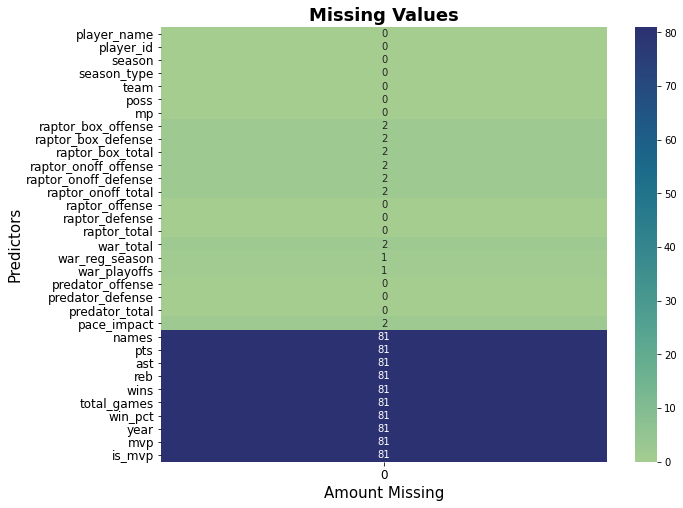

In [298]:
# Further investigation of the missing values
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(nba.isna().sum().to_frame(),annot=True,fmt='d',cmap='crest')
ax.set_xlabel('Amount Missing', fontdict = {'fontsize': 15})
ax.set_ylabel('Predictors', fontdict = {'fontsize': 15})
ax.set_title('Missing Values', fontweight='bold', fontdict = {'fontsize': 18})
plt.tick_params(axis='both', labelsize=12)
plt.show()

- can see there are a bunch of missing values that would need to be cleaned up. 
- we will take a deeper dive to see exactly what makes sense to clean this data.

In [299]:
# Make sure changes are made to see if names match up
nba[nba['pts'].isnull()][["names", "player_name","wins"]].head()

,names,player_name,wins
18,NaN,Jaylen Adams,NaN
257,NaN,OG Anunoby,NaN
258,NaN,OG Anunoby,NaN
259,NaN,OG Anunoby,NaN
260,NaN,OG Anunoby,NaN


In [300]:
# Drop any duplicates that we don't need
nba.drop_duplicates(inplace=True)
nba.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,names,pts,ast,reb,wins,total_games,win_pct,year,mvp,is_mvp
0,Alex Abrines,abrinal01,2017,PO,OKC,172,80,0.420828,-2.862454,-2.441626,-6.183824,-19.474686,-25.658510,-0.892617,-6.561258,-7.453875,-0.198700,0.000000,-0.198700,-3.298178,-6.535113,-9.833292,0.334678,Alex Abrines,5.970588,0.588235,1.264706,37.0,68.0,0.544118,2017.0,0.0,NO
1,Alex Abrines,abrinal01,2017,RS,OKC,2215,1055,0.770717,-0.179621,0.591096,0.029134,-2.644262,-2.615128,0.654933,-0.724233,-0.069300,1.447708,1.447708,0.000000,0.339201,-0.611866,-0.272665,0.325771,Alex Abrines,5.970588,0.588235,1.264706,37.0,68.0,0.544118,2017.0,0.0,NO
2,Alex Abrines,abrinal01,2018,PO,OKC,233,110,1.123761,-1.807486,-0.683725,4.965907,10.916521,15.882428,1.875157,0.740292,2.615450,0.311392,0.000000,0.311392,2.877519,-0.520954,2.356566,0.260479,Alex Abrines,4.706667,0.373333,1.520000,42.0,75.0,0.560000,2018.0,0.0,NO
3,Alex Abrines,abrinal01,2018,RS,OKC,2313,1134,0.236335,-1.717049,-1.480714,-1.922090,-1.154375,-3.076465,-0.211818,-1.728584,-1.940401,0.465912,0.465912,0.000000,-0.482078,-1.172227,-1.654306,-0.528330,Alex Abrines,4.706667,0.373333,1.520000,42.0,75.0,0.560000,2018.0,0.0,NO
4,Alex Abrines,abrinal01,2019,RS,OKC,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,-1.257688,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013,Alex Abrines,5.322581,0.645161,1.548387,21.0,31.0,0.677419,2019.0,0.0,NO


In [301]:
#Create new variable from raptor stats that only takes on stats from 2022
new_raptor = df3[df3['season'] ==2022]

# Create a test_df variable to predict later on 
test_df = new_raptor.merge(nba2, how = 'left' , right_on = 'names', left_on = 'player_name')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 931
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           932 non-null    object 
 1   player_id             932 non-null    object 
 2   season                932 non-null    int64  
 3   season_type           932 non-null    object 
 4   team                  932 non-null    object 
 5   poss                  932 non-null    int64  
 6   mp                    932 non-null    int64  
 7   raptor_box_offense    932 non-null    float64
 8   raptor_box_defense    932 non-null    float64
 9   raptor_box_total      932 non-null    float64
 10  raptor_onoff_offense  932 non-null    float64
 11  raptor_onoff_defense  932 non-null    float64
 12  raptor_onoff_total    932 non-null    float64
 13  raptor_offense        932 non-null    float64
 14  raptor_defense        932 non-null    float64
 15  raptor_total          9

In [302]:
#Drop null values in test set from the merge
test_df = test_df.dropna()

In [303]:
# Check info on test set to see if we need to drop any columns
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 931
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           605 non-null    object 
 1   player_id             605 non-null    object 
 2   season                605 non-null    int64  
 3   season_type           605 non-null    object 
 4   team                  605 non-null    object 
 5   poss                  605 non-null    int64  
 6   mp                    605 non-null    int64  
 7   raptor_box_offense    605 non-null    float64
 8   raptor_box_defense    605 non-null    float64
 9   raptor_box_total      605 non-null    float64
 10  raptor_onoff_offense  605 non-null    float64
 11  raptor_onoff_defense  605 non-null    float64
 12  raptor_onoff_total    605 non-null    float64
 13  raptor_offense        605 non-null    float64
 14  raptor_defense        605 non-null    float64
 15  raptor_total          6

In [304]:
#Drop player id and names from test set since we dont need these columns and so it can match up with the training data
test_df.drop(columns=['player_id', 'names'], inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 931
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           605 non-null    object 
 1   season                605 non-null    int64  
 2   season_type           605 non-null    object 
 3   team                  605 non-null    object 
 4   poss                  605 non-null    int64  
 5   mp                    605 non-null    int64  
 6   raptor_box_offense    605 non-null    float64
 7   raptor_box_defense    605 non-null    float64
 8   raptor_box_total      605 non-null    float64
 9   raptor_onoff_offense  605 non-null    float64
 10  raptor_onoff_defense  605 non-null    float64
 11  raptor_onoff_total    605 non-null    float64
 12  raptor_offense        605 non-null    float64
 13  raptor_defense        605 non-null    float64
 14  raptor_total          605 non-null    float64
 15  war_total             6

In [305]:
#MVP is a regular season award so we want to only have RS in our data set
test_df = test_df[test_df['season_type'] == 'RS']
test_df

,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year
1,Precious Achiuwa,2022,RS,TOR,3482,1725,-2.440797,2.028669,-0.412127,-2.003025,3.339821,1.336796,-2.516108,2.410593,-0.105515,2.309611,2.309611,0.0,-2.348484,2.251909,-0.096575,-0.764250,8.750000,1.333333,7.000000,7.0,12.0,0.583333,2023.0
3,Steven Adams,2022,RS,MEM,4147,1999,0.470690,1.489622,1.960312,6.284896,-2.941525,3.343371,1.684133,0.619227,2.303361,5.140587,5.140587,0.0,1.417837,1.789452,3.207289,-0.257750,6.727273,2.363636,11.727273,8.0,11.0,0.727273,2023.0
5,Bam Adebayo,2022,RS,MIA,3696,1825,-0.444262,3.761821,3.317559,0.705123,4.163776,4.868899,-0.253894,4.034816,3.780922,6.102629,6.102629,0.0,0.374052,3.445849,3.819901,0.355042,17.727273,3.454545,8.090909,4.0,11.0,0.363636,2023.0
6,Santi Aldama,2022,RS,MEM,763,360,-2.582435,-2.419018,-5.001452,-2.713256,1.162842,-1.550414,-2.809477,-1.865065,-4.674543,-0.354748,-0.354748,0.0,-1.643804,-2.281016,-3.924820,0.357553,9.166667,0.916667,6.083333,8.0,12.0,0.666667,2023.0
9,Nickeil Alexander-Walker,2022,RS,NOP,2717,1317,-1.532182,-1.541437,-3.073619,-2.698631,-1.186979,-3.885610,-1.852401,-1.547347,-3.399748,-0.439614,-0.439614,0.0,-0.700901,-1.523140,-2.224041,0.693287,3.250000,1.250000,0.750000,6.0,8.0,0.750000,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,McKinley Wright IV,2022,RS,MIN,41,19,0.200348,-7.509459,-7.309111,-6.870536,-10.137379,-17.007916,-1.290293,-8.510070,-9.800363,-0.068195,-0.068195,0.0,-2.485646,-9.368325,-11.853971,-0.218517,2.000000,2.000000,2.000000,1.0,1.0,1.000000,2023.0
924,Thaddeus Young,2022,RS,SAS,788,370,0.307668,-2.249817,-1.942150,-4.828731,2.549229,-2.279503,-0.746809,-1.363910,-2.110719,0.121260,0.121260,0.0,-0.455588,-1.106520,-1.562108,0.480847,2.000000,1.111111,2.555556,4.0,9.0,0.444444,2023.0
925,Thaddeus Young,2022,RS,TOR,964,475,-0.587236,3.274568,2.687332,0.911262,1.273840,2.185103,-0.328231,3.045558,2.717327,1.326680,1.326680,0.0,-0.230479,3.066159,2.835680,0.128361,2.000000,1.111111,2.555556,4.0,9.0,0.444444,2023.0
927,Trae Young,2022,RS,ATL,5536,2652,7.926036,-2.816709,5.109327,4.483829,-3.860173,0.623655,7.615987,-3.198078,4.417909,9.903858,9.903858,0.0,7.257725,-3.394290,3.863434,2.117038,27.600000,9.400000,3.400000,6.0,10.0,0.600000,2023.0


In [306]:
# Get the list of unique team names
team_names = test_df['team'].unique()

In [307]:
# Drop any null values that came from the merge 
nba1 = nba.dropna()

# Check to make sure changes were made 
nba1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7206 entries, 0 to 7288
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           7206 non-null   object 
 1   player_id             7206 non-null   object 
 2   season                7206 non-null   int64  
 3   season_type           7206 non-null   object 
 4   team                  7206 non-null   object 
 5   poss                  7206 non-null   int64  
 6   mp                    7206 non-null   int64  
 7   raptor_box_offense    7206 non-null   float64
 8   raptor_box_defense    7206 non-null   float64
 9   raptor_box_total      7206 non-null   float64
 10  raptor_onoff_offense  7206 non-null   float64
 11  raptor_onoff_defense  7206 non-null   float64
 12  raptor_onoff_total    7206 non-null   float64
 13  raptor_offense        7206 non-null   float64
 14  raptor_defense        7206 non-null   float64
 15  raptor_total         

In [308]:
# Drop columns we dont need
nba1.drop(columns=['player_id', 'names', 'is_mvp'], inplace=True)
nba1

,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp
0,Alex Abrines,2017,PO,OKC,172,80,0.420828,-2.862454,-2.441626,-6.183824,-19.474686,-25.658510,-0.892617,-6.561258,-7.453875,-0.198700,0.000000,-0.198700,-3.298178,-6.535113,-9.833292,0.334678,5.970588,0.588235,1.264706,37.0,68.0,0.544118,2017.0,0.0
1,Alex Abrines,2017,RS,OKC,2215,1055,0.770717,-0.179621,0.591096,0.029134,-2.644262,-2.615128,0.654933,-0.724233,-0.069300,1.447708,1.447708,0.000000,0.339201,-0.611866,-0.272665,0.325771,5.970588,0.588235,1.264706,37.0,68.0,0.544118,2017.0,0.0
2,Alex Abrines,2018,PO,OKC,233,110,1.123761,-1.807486,-0.683725,4.965907,10.916521,15.882428,1.875157,0.740292,2.615450,0.311392,0.000000,0.311392,2.877519,-0.520954,2.356566,0.260479,4.706667,0.373333,1.520000,42.0,75.0,0.560000,2018.0,0.0
3,Alex Abrines,2018,RS,OKC,2313,1134,0.236335,-1.717049,-1.480714,-1.922090,-1.154375,-3.076465,-0.211818,-1.728584,-1.940401,0.465912,0.465912,0.000000,-0.482078,-1.172227,-1.654306,-0.528330,4.706667,0.373333,1.520000,42.0,75.0,0.560000,2018.0,0.0
4,Alex Abrines,2019,RS,OKC,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,-1.257688,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013,5.322581,0.645161,1.548387,21.0,31.0,0.677419,2019.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7284,Ivica Zubac,2020,PO,LAC,653,320,-1.553331,2.141732,0.588401,12.778874,6.087758,18.866632,1.355250,3.069956,4.425206,1.203304,0.000000,1.203304,-1.778379,4.062312,2.283933,-0.401691,8.277778,1.138889,7.541667,49.0,72.0,0.680556,2020.0,0.0
7285,Ivica Zubac,2020,RS,LAC,2794,1326,1.000154,3.853754,4.853908,1.103114,2.232698,3.335812,1.040158,3.661525,4.701684,5.020903,5.020903,0.000000,0.032143,3.161284,3.193427,-0.412144,8.277778,1.138889,7.541667,49.0,72.0,0.680556,2020.0,0.0
7286,Ivica Zubac,2021,PO,LAC,590,301,-0.610172,3.128919,2.518747,-6.870858,0.848330,-6.022529,-2.056054,2.840494,0.784440,0.556697,0.000000,0.556697,-2.104796,2.298023,0.193227,-0.544855,9.027778,1.250000,7.208333,47.0,72.0,0.652778,2021.0,0.0
7287,Ivica Zubac,2021,RS,LAC,3318,1609,-0.329357,2.930685,2.601328,-1.772245,0.033290,-1.738956,-0.705079,2.469765,1.764686,3.704630,3.704630,0.000000,-0.655541,2.276808,1.621268,-0.041653,9.027778,1.250000,7.208333,47.0,72.0,0.652778,2021.0,0.0


In [309]:
# Check to make sure changes were made 
nba1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7206 entries, 0 to 7288
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           7206 non-null   object 
 1   season                7206 non-null   int64  
 2   season_type           7206 non-null   object 
 3   team                  7206 non-null   object 
 4   poss                  7206 non-null   int64  
 5   mp                    7206 non-null   int64  
 6   raptor_box_offense    7206 non-null   float64
 7   raptor_box_defense    7206 non-null   float64
 8   raptor_box_total      7206 non-null   float64
 9   raptor_onoff_offense  7206 non-null   float64
 10  raptor_onoff_defense  7206 non-null   float64
 11  raptor_onoff_total    7206 non-null   float64
 12  raptor_offense        7206 non-null   float64
 13  raptor_defense        7206 non-null   float64
 14  raptor_total          7206 non-null   float64
 15  war_total            

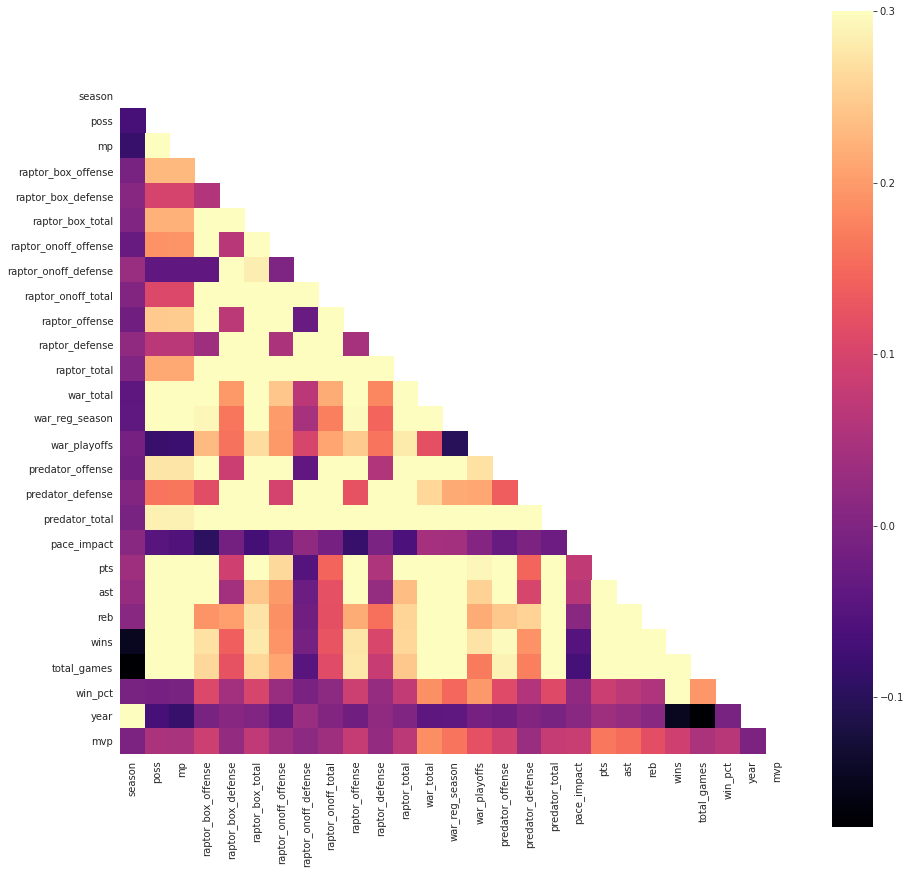

In [310]:
# #correlations of each features
corr_matrix = nba1.corr()

#plot heat map
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True,cmap="magma")
    

In [311]:
# Check to see which weights are mostly correlated to the target
nba1.corr()['mvp']

season                 -0.003044
poss                    0.050217
mp                      0.048467
raptor_box_offense      0.086708
raptor_box_defense      0.022376
raptor_box_total        0.072791
raptor_onoff_offense    0.034944
raptor_onoff_defense    0.015876
raptor_onoff_total      0.035734
raptor_offense          0.079165
raptor_defense          0.023092
raptor_total            0.069500
war_total               0.187204
war_reg_season          0.161250
war_playoffs            0.120983
predator_offense        0.094095
predator_defense        0.030168
predator_total          0.080446
pace_impact             0.084469
pts                     0.165396
ast                     0.152544
reb                     0.117976
wins                    0.090452
total_games             0.049620
win_pct                 0.065286
year                   -0.003044
mvp                     1.000000
Name: mvp, dtype: float64

In [312]:
# Look at how many players are actually in the data set 
len(nba1['player_name'].unique())

1304

In [313]:
#Groupby player name and year
nba1.groupby(['player_name', 'year']).get_group(('Precious Achiuwa', 2022))

,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp
7,Precious Achiuwa,2022,PO,TOR,320,167,-3.399773,-1.121844,-4.521616,1.741147,0.531325,2.272471,-2.531130,-0.755062,-3.286191,-0.046953,0.000000,-0.046953,-3.958067,-0.451657,-4.409724,-0.340793,9.09589,1.123288,6.479452,46.0,73.0,0.630137,2022.0,0.0
8,Precious Achiuwa,2022,RS,TOR,3482,1725,-2.440797,2.028669,-0.412127,-2.003025,3.339821,1.336796,-2.516108,2.410593,-0.105515,2.309611,2.309611,0.000000,-2.348484,2.251909,-0.096575,-0.764250,9.09589,1.123288,6.479452,46.0,73.0,0.630137,2022.0,0.0


In [314]:
#Check to see who had the highest scoring average for any player that played more than 70 games 
high_score = nba1[nba1['total_games'] >70] .sort_values('pts', ascending=False).head(10)
high_score

,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp
2710,James Harden,2019,RS,HOU,5857,2867,10.413689,1.713256,12.126945,4.773097,-1.601385,3.171711,9.815956,1.121363,10.937320,20.057946,20.057946,0.000000,10.864945,1.477620,12.342565,0.187883,36.128205,7.512821,6.641026,51.0,78.0,0.653846,2019.0,0.0
2709,James Harden,2019,PO,HOU,871,424,6.903464,2.325552,9.229017,9.460875,-2.873536,6.587340,7.885547,1.336647,9.222194,2.733422,0.000000,2.733422,11.082665,3.011380,14.094045,2.319541,36.128205,7.512821,6.641026,51.0,78.0,0.653846,2019.0,0.0
1914,Kevin Durant,2014,PO,OKC,1603,815,4.407863,1.126405,5.534267,6.570813,-2.063456,4.507357,5.100956,0.476646,5.577602,3.661864,0.000000,3.661864,4.351626,0.432516,4.784142,2.352985,32.012346,5.493827,7.382716,58.0,81.0,0.716049,2014.0,1.0
1915,Kevin Durant,2014,RS,OKC,6344,3122,7.705664,-0.371664,7.334000,5.311288,-0.960082,4.351206,7.638684,-0.552202,7.086482,16.010432,16.010432,0.000000,7.349493,-0.387499,6.961994,2.096353,32.012346,5.493827,7.382716,58.0,81.0,0.716049,2014.0,1.0
6938,Russell Westbrook,2017,PO,OKC,404,194,6.020966,-1.784814,4.236152,11.504977,25.681342,37.186319,7.612636,3.755890,11.368526,1.490304,0.000000,1.490304,6.179535,3.720015,9.899550,3.286869,31.580247,10.370370,10.666667,46.0,81.0,0.567901,2017.0,1.0
6939,Russell Westbrook,2017,RS,OKC,5860,2802,7.570143,-1.468145,6.101998,6.177250,-0.063180,6.114070,7.803999,-1.272230,6.531769,13.816333,13.816333,0.000000,7.989260,-1.132685,6.856575,4.045869,31.580247,10.370370,10.666667,46.0,81.0,0.567901,2017.0,1.0
2708,James Harden,2018,RS,HOU,5224,2551,9.999814,1.493935,11.493749,3.307226,-0.414159,2.893067,9.127370,1.151305,10.278675,17.048015,17.048015,0.000000,9.910777,1.079184,10.989961,0.531938,30.430556,8.750000,5.402778,59.0,72.0,0.819444,2018.0,1.0
2707,James Harden,2018,PO,HOU,1242,621,6.827297,1.271647,8.098944,6.582058,4.708614,11.290672,7.167760,2.012913,9.180674,3.878148,0.000000,3.878148,7.430627,3.869323,11.299950,-0.511417,30.430556,8.750000,5.402778,59.0,72.0,0.819444,2018.0,1.0
1583,Stephen Curry,2016,RS,GSW,5780,2700,11.075536,2.219631,13.295166,8.987145,4.477085,13.464230,11.072301,2.789798,13.862099,23.659318,23.659318,0.000000,11.770319,3.284836,15.055155,3.311178,30.063291,6.670886,5.443038,71.0,79.0,0.898734,2016.0,1.0
1582,Stephen Curry,2016,PO,GSW,1273,614,8.068995,-0.723119,7.345877,2.306388,-1.444676,0.861712,7.233373,-0.985195,6.248178,3.007555,0.000000,3.007555,5.480702,0.115620,5.596322,3.283108,30.063291,6.670886,5.443038,71.0,79.0,0.898734,2016.0,1.0


<AxesSubplot:xlabel='player_name'>

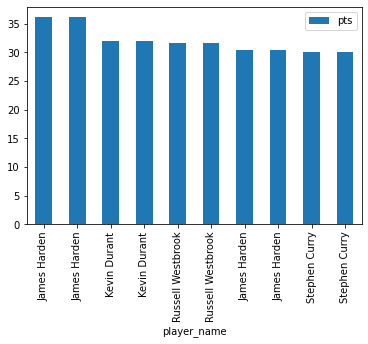

In [315]:
#Plot players that had highest scoring average in data set 
high_score.plot.bar('player_name', 'pts')

In [316]:
# Take a look at how many MVPs are in the data set
nba1[nba1['mvp'] == 1]

,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp
216,Giannis Antetokounmpo,2019,PO,MIL,1094,514,2.789067,4.202336,6.991403,0.452849,5.352495,5.805344,2.449746,4.612899,7.062645,2.697328,0.000000,2.697328,4.489336,4.141308,8.630644,1.623246,27.694444,5.888889,12.472222,56.0,72.0,0.777778,2019.0,1.0
217,Giannis Antetokounmpo,2019,RS,MIL,5171,2358,4.601266,2.164171,6.765438,1.703340,3.784819,5.488159,4.184342,2.567988,6.752330,11.572533,11.572533,0.000000,4.257098,2.499310,6.756409,1.254684,27.694444,5.888889,12.472222,56.0,72.0,0.777778,2019.0,1.0
218,Giannis Antetokounmpo,2020,PO,MIL,602,277,5.061389,-0.150970,4.910419,0.797245,2.551526,3.348772,4.437712,0.348085,4.785797,1.118328,0.000000,1.118328,1.205823,-0.857330,0.348494,1.802269,29.476190,5.619048,13.587302,51.0,63.0,0.809524,2020.0,1.0
219,Giannis Antetokounmpo,2020,RS,MIL,4292,1917,5.691956,3.007846,8.699803,3.196904,6.699500,9.896404,5.464958,3.873296,9.338254,12.031285,12.031285,0.000000,5.355738,3.172082,8.527820,1.799126,29.476190,5.619048,13.587302,51.0,63.0,0.809524,2020.0,1.0
1580,Stephen Curry,2015,PO,GSW,1668,826,7.143250,1.099762,8.243013,-1.304581,10.319199,9.014618,5.713215,3.025837,8.739052,5.175088,0.000000,5.175088,5.347108,2.556067,7.903175,3.506650,23.750000,7.737500,4.262500,67.0,80.0,0.837500,2015.0,1.0
1581,Stephen Curry,2015,RS,GSW,5524,2613,8.916145,1.851514,10.767659,9.792626,3.536520,13.329146,9.472839,2.259681,11.732520,19.914785,19.914785,0.000000,9.826624,2.687538,12.514162,3.016670,23.750000,7.737500,4.262500,67.0,80.0,0.837500,2015.0,1.0
1582,Stephen Curry,2016,PO,GSW,1273,614,8.068995,-0.723119,7.345877,2.306388,-1.444676,0.861712,7.233373,-0.985195,6.248178,3.007555,0.000000,3.007555,5.480702,0.115620,5.596322,3.283108,30.063291,6.670886,5.443038,71.0,79.0,0.898734,2016.0,1.0
1583,Stephen Curry,2016,RS,GSW,5780,2700,11.075536,2.219631,13.295166,8.987145,4.477085,13.464230,11.072301,2.789798,13.862099,23.659318,23.659318,0.000000,11.770319,3.284836,15.055155,3.311178,30.063291,6.670886,5.443038,71.0,79.0,0.898734,2016.0,1.0
1914,Kevin Durant,2014,PO,OKC,1603,815,4.407863,1.126405,5.534267,6.570813,-2.063456,4.507357,5.100956,0.476646,5.577602,3.661864,0.000000,3.661864,4.351626,0.432516,4.784142,2.352985,32.012346,5.493827,7.382716,58.0,81.0,0.716049,2014.0,1.0
1915,Kevin Durant,2014,RS,OKC,6344,3122,7.705664,-0.371664,7.334000,5.311288,-0.960082,4.351206,7.638684,-0.552202,7.086482,16.010432,16.010432,0.000000,7.349493,-0.387499,6.961994,2.096353,32.012346,5.493827,7.382716,58.0,81.0,0.716049,2014.0,1.0


In [317]:
#MVP is a regular season award so we want to only have RS in our data set
nba1 = nba1[nba1['season_type'] == 'RS']
nba1

,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp
1,Alex Abrines,2017,RS,OKC,2215,1055,0.770717,-0.179621,0.591096,0.029134,-2.644262,-2.615128,0.654933,-0.724233,-0.069300,1.447708,1.447708,0.0,0.339201,-0.611866,-0.272665,0.325771,5.970588,0.588235,1.264706,37.0,68.0,0.544118,2017.0,0.0
3,Alex Abrines,2018,RS,OKC,2313,1134,0.236335,-1.717049,-1.480714,-1.922090,-1.154375,-3.076465,-0.211818,-1.728584,-1.940401,0.465912,0.465912,0.0,-0.482078,-1.172227,-1.654306,-0.528330,4.706667,0.373333,1.520000,42.0,75.0,0.560000,2018.0,0.0
4,Alex Abrines,2019,RS,OKC,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,-1.257688,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.0,-4.577678,1.543282,-3.034396,-0.268013,5.322581,0.645161,1.548387,21.0,31.0,0.677419,2019.0,0.0
6,Precious Achiuwa,2021,RS,MIA,1557,737,-3.876227,1.172972,-2.703254,-3.914412,-1.331056,-5.245468,-4.113660,0.709264,-3.404396,-0.246776,-0.246776,0.0,-3.657064,0.374133,-3.282930,0.292227,4.983607,0.475410,3.409836,31.0,61.0,0.508197,2021.0,0.0
8,Precious Achiuwa,2022,RS,TOR,3482,1725,-2.440797,2.028669,-0.412127,-2.003025,3.339821,1.336796,-2.516108,2.410593,-0.105515,2.309611,2.309611,0.0,-2.348484,2.251909,-0.096575,-0.764250,9.095890,1.123288,6.479452,46.0,73.0,0.630137,2022.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7282,Ivica Zubac,2019,RS,LAC,1141,524,-3.237184,1.414996,-1.822188,-1.694993,2.800092,1.105099,-3.142927,1.774239,-1.368688,0.369725,0.369725,0.0,-3.105152,0.994436,-2.110716,0.120889,8.898305,1.067797,6.135593,32.0,59.0,0.542373,2019.0,0.0
7283,Ivica Zubac,2019,RS,LAL,1120,516,-1.459352,1.114247,-0.345105,-1.115425,2.956169,1.840744,-1.450572,1.532064,0.081491,0.745271,0.745271,0.0,-2.387528,1.045695,-1.341833,-0.021405,8.898305,1.067797,6.135593,32.0,59.0,0.542373,2019.0,0.0
7285,Ivica Zubac,2020,RS,LAC,2794,1326,1.000154,3.853754,4.853908,1.103114,2.232698,3.335812,1.040158,3.661525,4.701684,5.020903,5.020903,0.0,0.032143,3.161284,3.193427,-0.412144,8.277778,1.138889,7.541667,49.0,72.0,0.680556,2020.0,0.0
7287,Ivica Zubac,2021,RS,LAC,3318,1609,-0.329357,2.930685,2.601328,-1.772245,0.033290,-1.738956,-0.705079,2.469765,1.764686,3.704630,3.704630,0.0,-0.655541,2.276808,1.621268,-0.041653,9.027778,1.250000,7.208333,47.0,72.0,0.652778,2021.0,0.0


In [318]:
# Check to see what data looks like in 2022
nba1[nba1['year'] ==2022]

,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp
8,Precious Achiuwa,2022,RS,TOR,3482,1725,-2.440797,2.028669,-0.412127,-2.003025,3.339821,1.336796,-2.516108,2.410593,-0.105515,2.309611,2.309611,0.0,-2.348484,2.251909,-0.096575,-0.764250,9.095890,1.123288,6.479452,46.0,73.0,0.630137,2022.0,0.0
38,Steven Adams,2022,RS,MEM,4147,1999,0.470690,1.489622,1.960312,6.284896,-2.941525,3.343371,1.684133,0.619227,2.303361,5.140587,5.140587,0.0,1.417837,1.789452,3.207289,-0.257750,6.947368,3.368421,10.000000,51.0,76.0,0.671053,2022.0,0.0
47,Bam Adebayo,2022,RS,MIA,3696,1825,-0.444262,3.761821,3.317559,0.705123,4.163776,4.868899,-0.253894,4.034816,3.780922,6.102629,6.102629,0.0,0.374052,3.445849,3.819901,0.355042,19.071429,3.392857,10.071429,36.0,56.0,0.642857,2022.0,0.0
65,Santi Aldama,2022,RS,MEM,763,360,-2.582435,-2.419018,-5.001452,-2.713256,1.162842,-1.550414,-2.809477,-1.865065,-4.674543,-0.354748,-0.354748,0.0,-1.643804,-2.281016,-3.924820,0.357553,4.125000,0.656250,2.718750,20.0,32.0,0.625000,2022.0,0.0
88,LaMarcus Aldridge,2022,RS,BRK,2205,1050,-0.515821,2.245440,1.729619,1.093065,-0.462139,0.630926,-0.241157,1.830768,1.589611,2.319518,2.319518,0.0,0.290868,0.844519,1.135387,-0.226050,12.914894,0.893617,5.489362,26.0,47.0,0.553191,2022.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7238,Thaddeus Young,2022,RS,TOR,964,475,-0.587236,3.274568,2.687332,0.911262,1.273840,2.185103,-0.328231,3.045558,2.717327,1.326680,1.326680,0.0,-0.230479,3.066159,2.835680,0.128361,6.192308,2.000000,4.000000,27.0,52.0,0.519231,2022.0,0.0
7244,Trae Young,2022,RS,ATL,5536,2652,7.926036,-2.816709,5.109327,4.483829,-3.860173,0.623655,7.615987,-3.198078,4.417909,9.903858,9.903858,0.0,7.257725,-3.394290,3.863434,2.117038,28.355263,9.697368,3.736842,40.0,76.0,0.526316,2022.0,0.0
7246,Omer Yurtseven,2022,RS,MIA,1445,706,-2.846163,1.389214,-1.456948,1.506511,-0.758275,0.748235,-2.141570,0.955199,-1.186370,0.563127,0.563127,0.0,-2.314126,0.332039,-1.982086,-0.016754,5.339286,0.875000,5.250000,39.0,56.0,0.696429,2022.0,0.0
7257,Cody Zeller,2022,RS,POR,748,355,-0.380332,-3.771124,-4.151456,0.365332,-0.402120,-0.036788,-0.222446,-3.226756,-3.449202,-0.127035,-0.127035,0.0,-0.396488,-2.401036,-2.797523,0.312001,5.185185,0.814815,4.629630,13.0,27.0,0.481481,2022.0,0.0


In [319]:
# Take a look at how many MVPs are in the data set
nba1[nba1['mvp'] == 1]

,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp
217,Giannis Antetokounmpo,2019,RS,MIL,5171,2358,4.601266,2.164171,6.765438,1.703340,3.784819,5.488159,4.184342,2.567988,6.752330,11.572533,11.572533,0.0,4.257098,2.499310,6.756409,1.254684,27.694444,5.888889,12.472222,56.0,72.0,0.777778,2019.0,1.0
219,Giannis Antetokounmpo,2020,RS,MIL,4292,1917,5.691956,3.007846,8.699803,3.196904,6.699500,9.896404,5.464958,3.873296,9.338254,12.031285,12.031285,0.0,5.355738,3.172082,8.527820,1.799126,29.476190,5.619048,13.587302,51.0,63.0,0.809524,2020.0,1.0
1581,Stephen Curry,2015,RS,GSW,5524,2613,8.916145,1.851514,10.767659,9.792626,3.536520,13.329146,9.472839,2.259681,11.732520,19.914785,19.914785,0.0,9.826624,2.687538,12.514162,3.016670,23.750000,7.737500,4.262500,67.0,80.0,0.837500,2015.0,1.0
1583,Stephen Curry,2016,RS,GSW,5780,2700,11.075536,2.219631,13.295166,8.987145,4.477085,13.464230,11.072301,2.789798,13.862099,23.659318,23.659318,0.0,11.770319,3.284836,15.055155,3.311178,30.063291,6.670886,5.443038,71.0,79.0,0.898734,2016.0,1.0
1915,Kevin Durant,2014,RS,OKC,6344,3122,7.705664,-0.371664,7.334000,5.311288,-0.960082,4.351206,7.638684,-0.552202,7.086482,16.010432,16.010432,0.0,7.349493,-0.387499,6.961994,2.096353,32.012346,5.493827,7.382716,58.0,81.0,0.716049,2014.0,1.0
2708,James Harden,2018,RS,HOU,5224,2551,9.999814,1.493935,11.493749,3.307226,-0.414159,2.893067,9.127370,1.151305,10.278675,17.048015,17.048015,0.0,9.910777,1.079184,10.989961,0.531938,30.430556,8.750000,5.402778,59.0,72.0,0.819444,2018.0,1.0
3597,Nikola Jokic,2021,RS,DEN,5087,2488,8.566732,1.966245,10.532978,8.417430,-5.128579,3.288851,8.964776,0.589788,9.554564,15.756031,15.756031,0.0,9.346850,0.972368,10.319218,0.885007,26.361111,8.319444,10.833333,47.0,72.0,0.652778,2021.0,1.0
3599,Nikola Jokic,2022,RS,DEN,5130,2476,8.661507,6.145971,14.807478,7.640221,3.763933,11.404154,8.869091,5.996284,14.865375,22.693872,22.693872,0.0,8.977276,5.751404,14.728680,1.982546,27.081081,7.891892,13.770270,46.0,74.0,0.621622,2022.0,1.0
6939,Russell Westbrook,2017,RS,OKC,5860,2802,7.570143,-1.468145,6.101998,6.177250,-0.063180,6.114070,7.803999,-1.272230,6.531769,13.816333,13.816333,0.0,7.989260,-1.132685,6.856575,4.045869,31.580247,10.370370,10.666667,46.0,81.0,0.567901,2017.0,1.0


In [320]:
# create variable to see what player scored the highest each year
high_score_year = nba1.groupby('year').apply(lambda x: x.sort_values('pts', ascending=False).head(1))
high_score_year

,,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014.0,1915,Kevin Durant,2014,RS,OKC,6344,3122,7.705664,-0.371664,7.334000,5.311288,-0.960082,4.351206,7.638684,-0.552202,7.086482,16.010432,16.010432,0.0,7.349493,-0.387499,6.961994,2.096353,32.012346,5.493827,7.382716,58.0,81.0,0.716049,2014.0,1.0
2015.0,6935,Russell Westbrook,2015,RS,OKC,4759,2302,5.624267,0.255377,5.879644,6.232059,-3.351318,2.880742,6.093560,-0.487869,5.605691,10.119741,10.119741,0.0,6.239869,-0.201795,6.038074,2.991530,28.149254,8.567164,7.283582,40.0,67.0,0.597015,2015.0,0.0
2016.0,1583,Stephen Curry,2016,RS,GSW,5780,2700,11.075536,2.219631,13.295166,8.987145,4.477085,13.464230,11.072301,2.789798,13.862099,23.659318,23.659318,0.0,11.770319,3.284836,15.055155,3.311178,30.063291,6.670886,5.443038,71.0,79.0,0.898734,2016.0,1.0
2017.0,6939,Russell Westbrook,2017,RS,OKC,5860,2802,7.570143,-1.468145,6.101998,6.177250,-0.063180,6.114070,7.803999,-1.272230,6.531769,13.816333,13.816333,0.0,7.989260,-1.132685,6.856575,4.045869,31.580247,10.370370,10.666667,46.0,81.0,0.567901,2017.0,1.0
2018.0,2708,James Harden,2018,RS,HOU,5224,2551,9.999814,1.493935,11.493749,3.307226,-0.414159,2.893067,9.127370,1.151305,10.278675,17.048015,17.048015,0.0,9.910777,1.079184,10.989961,0.531938,30.430556,8.750000,5.402778,59.0,72.0,0.819444,2018.0,1.0
2019.0,2710,James Harden,2019,RS,HOU,5857,2867,10.413689,1.713256,12.126945,4.773097,-1.601385,3.171711,9.815956,1.121363,10.937320,20.057946,20.057946,0.0,10.864945,1.477620,12.342565,0.187883,36.128205,7.512821,6.641026,51.0,78.0,0.653846,2019.0,0.0
2020.0,2712,James Harden,2020,RS,HOU,5330,2483,9.810578,1.113252,10.923829,1.700370,3.670190,5.370560,8.745625,1.704375,10.450000,16.705593,16.705593,0.0,8.441963,2.286450,10.728413,-0.100863,34.338235,7.529412,6.558824,43.0,68.0,0.632353,2020.0,0.0
2021.0,1591,Stephen Curry,2021,RS,GSW,4715,2152,8.884195,-2.399078,6.485117,5.510388,0.515109,6.025497,8.738701,-1.939050,6.799651,10.760575,10.760575,0.0,8.087152,-1.656422,6.430730,2.653507,31.984127,5.761905,5.476190,37.0,63.0,0.587302,2021.0,0.0
2022.0,1991,Joel Embiid,2022,RS,PHI,4640,2297,4.243889,3.752026,7.995915,3.067727,3.005761,6.073487,4.220412,3.799734,8.020146,12.695724,12.695724,0.0,4.208803,4.221775,8.430578,0.585294,30.573529,4.176471,11.705882,45.0,68.0,0.661765,2022.0,0.0


<AxesSubplot:xlabel='year'>

<Figure size 1440x720 with 0 Axes>

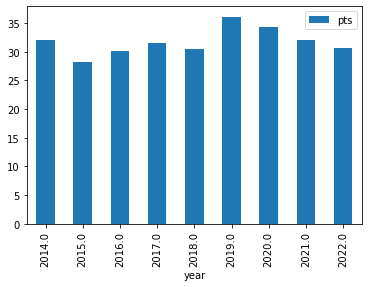

In [321]:
fig = plt.figure(figsize=(20, 10))
high_score_year.plot.bar('year', 'pts')

In [322]:
#Saving test data to csv file 
df = test_df
df.to_csv('file1.csv')

In [323]:
df1 = nba1
df1.to_csv('file2.csv')

# Handling Data Imbalance

Being that the data set is very imbalanced, I will need to do some further research on which technique would be beneficial going forward in handling the issue. If imbalance is not handled, the model will not be accurate in which the majority will always take precedent. 

MVP 0: 5287
MVP 1: 9


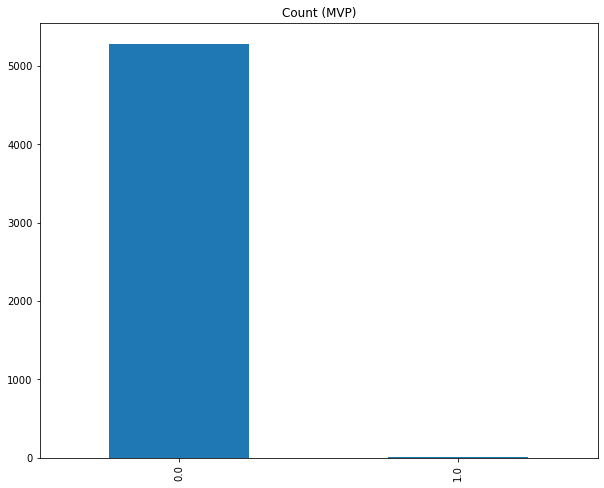

In [324]:
# Can see there is a huge imbalance to the data set 
target_count = nba1.mvp.value_counts()
print('MVP 0:', target_count[0])
print('MVP 1:', target_count[1])

fig = plt.figure(figsize=(10, 8))
target_count.plot(kind='bar', title='Count (MVP)');

In [325]:
# MVP count
count_mvp_0, count_mvp_1 = nba1.mvp.value_counts()

# Divide by MVP
df_mvp_0 = nba1[nba1['mvp'] == 0]
df_mvp_1 = nba1[nba1['mvp'] == 1]

Random under-sampling:
1.0    9
0.0    9
Name: mvp, dtype: int64


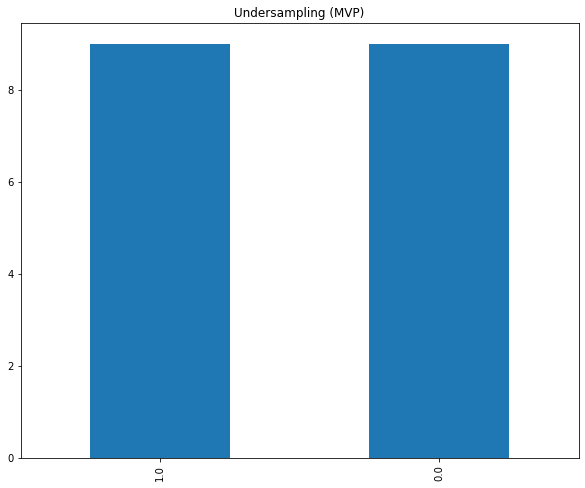

In [326]:
# Show if random undersampling will create less imbalance on data 
df_mvp_0_under = df_mvp_0.sample(count_mvp_1)
df_test_under = pd.concat([df_mvp_0_under, df_mvp_1], axis=0)

print('Random under-sampling:')
print(df_test_under.mvp.value_counts())

fig = plt.figure(figsize=(10, 8))
df_test_under.mvp.value_counts().plot(kind='bar', title='Undersampling (MVP)');

Random over-sampling:
1.0    5287
0.0    5287
Name: mvp, dtype: int64


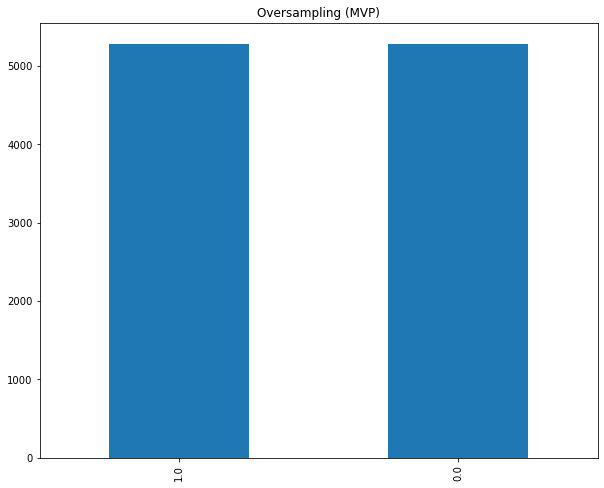

In [327]:
# Show if random oversampling will give us the same result 
df_mvp_1_over = df_mvp_1.sample(count_mvp_0, replace=True)
df_test_over = pd.concat([df_mvp_0, df_mvp_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.mvp.value_counts())

fig = plt.figure(figsize=(10, 8))
df_test_over.mvp.value_counts().plot(kind='bar', title='Oversampling (MVP)');

# Train Test Split

In [328]:
# Train Test Split
X = nba1.drop(columns = 'mvp', axis = 1)
y = nba1['mvp']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.40, random_state = 42)

In [329]:
# Select only the numerical columns
numerical_data = X_train.select_dtypes(include=["int64", "float64"])

In [330]:
test_df.columns

Index(['player_name', 'season', 'season_type', 'team', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact', 'pts', 'ast',
       'reb', 'wins', 'total_games', 'win_pct', 'year'],
      dtype='object')

In [331]:
# Print X_train columns to see everything before it's modeled
X_train.columns

Index(['player_name', 'season', 'season_type', 'team', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact', 'pts', 'ast',
       'reb', 'wins', 'total_games', 'win_pct', 'year'],
      dtype='object')

# Create Pipeline

In [332]:
# Create number column variable
num_cols = X_train.select_dtypes('number').columns

In [333]:
# Create steps for pipeline

# Create numeric pipeline
numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

# Create nominal pipeline
nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', MaxAbsScaler())])

# Instantiate columnTransformer
ct = ColumnTransformer(
    [("ohepipe", nominal_pipeline, ['team']), 
     ("numpipe", numeric_pipeline, num_cols)])

# Instantiate final pipe 
final_pipe1 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                        ('over', RandomOverSampler()),
                        ('smote', SMOTE()),
                        #Use for imbalance purposes
                           #Use for imbalance purposes
                      ('model', LogisticRegression(random_state = 42))])

# print pipeline to make sure everything is correct
final_pipe1

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ohepipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['team']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['season', 'poss', 'mp', 'raptor_box_offense', 'raptor_box_defense',
       'raptor_box_total', 'raptor_onoff_off...
       '

# Model 1 - Logistic Regression

In [334]:
all_data = pd.concat([X_train,X_test],0)
all_data

all_y = pd.concat([y_train,y_test],0)

0.9987409505823104
0.9957527135441245


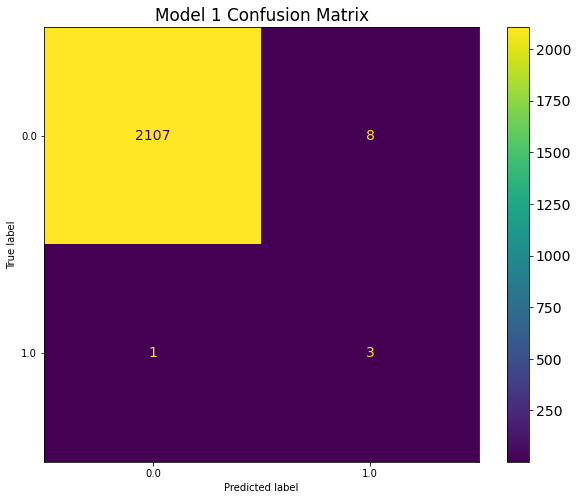

In [335]:
# Fit the model
final_pipe1.fit(X_train,y_train)

#Print scores from model
print(final_pipe1.score(X_train,y_train))
print(final_pipe1.score(X_test,y_test))

#Predict first model
ypred = final_pipe1.predict(X_test)

# #plot confusion matrix 
fig, ax = plt.subplots(figsize = (10, 8))
plt.rcParams.update({'font.size': 14})
ax.set_title('Model 1 Confusion Matrix')
plot_confusion_matrix(final_pipe1, X_test, y_test, ax=ax);

In [336]:
# Predict on test data
testpred = final_pipe1.predict(test_df)

In [337]:
# Calculating accuracy score
model1_accuracy = accuracy_score(y_test, ypred)
model1_accuracy

print('Model 1 Accuracy Score:', model1_accuracy)

Model 1 Accuracy Score: 0.9957527135441245


In [338]:
print(classification_report(y_test, ypred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.27      0.75      0.40         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.27      0.75      0.40         4
   macro avg       0.09      0.25      0.13         4
weighted avg       0.27      0.75      0.40         4



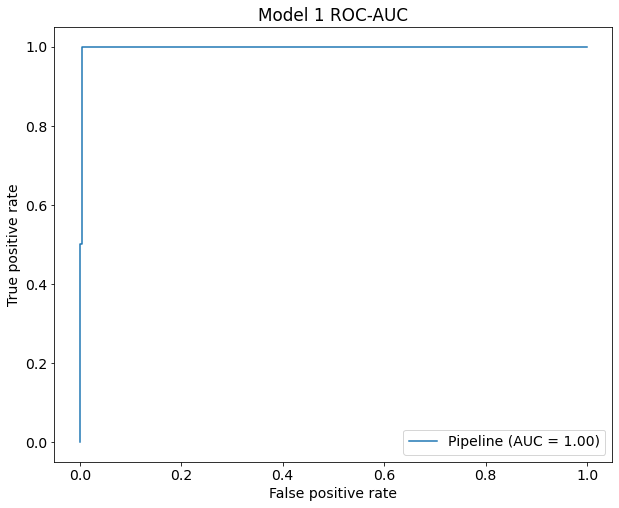

In [339]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(final_pipe1, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 1 ROC-AUC')
plt.show()

In [340]:
colsnum= ['season', 'poss', 'mp', 'raptor_box_offense', 'raptor_box_defense',
         'raptor_box_total', 'raptor_onoff_offense', 'raptor_onoff_defense',
         'raptor_onoff_total', 'raptor_offense', 'raptor_defense',
         'raptor_total', 'war_total', 'war_reg_season', 'war_playoffs',
         'predator_offense', 'predator_defense', 'predator_total', 'pace_impact',
         'pts', 'ast', 'reb', 'wins', 'total_games', 'win_pct', 'year']

In [341]:
onehotcolnames = final_pipe1.named_steps['preprocess'].transformers_[0][1]['onehotenc'].get_feature_names().tolist()

In [342]:
coef_col = colsnum + onehotcolnames

In [343]:
coeffs = final_pipe1.steps[3][1].coef_[0]

In [344]:
coef_df = pd.DataFrame({'features': coef_col, 'coefs': coeffs})

In [345]:
coef_df.sort_values(by = 'coefs', ascending = False)

,features,coefs
53,x0_UTA,2.871440
51,x0_SAS,2.481170
50,x0_SAC,2.470857
15,predator_offense,1.659066
34,x0_GSW,1.068195
32,x0_DEN,0.998994
41,x0_MIL,0.923197
42,x0_MIN,0.923197
6,raptor_onoff_offense,0.852210
40,x0_MIA,0.608731


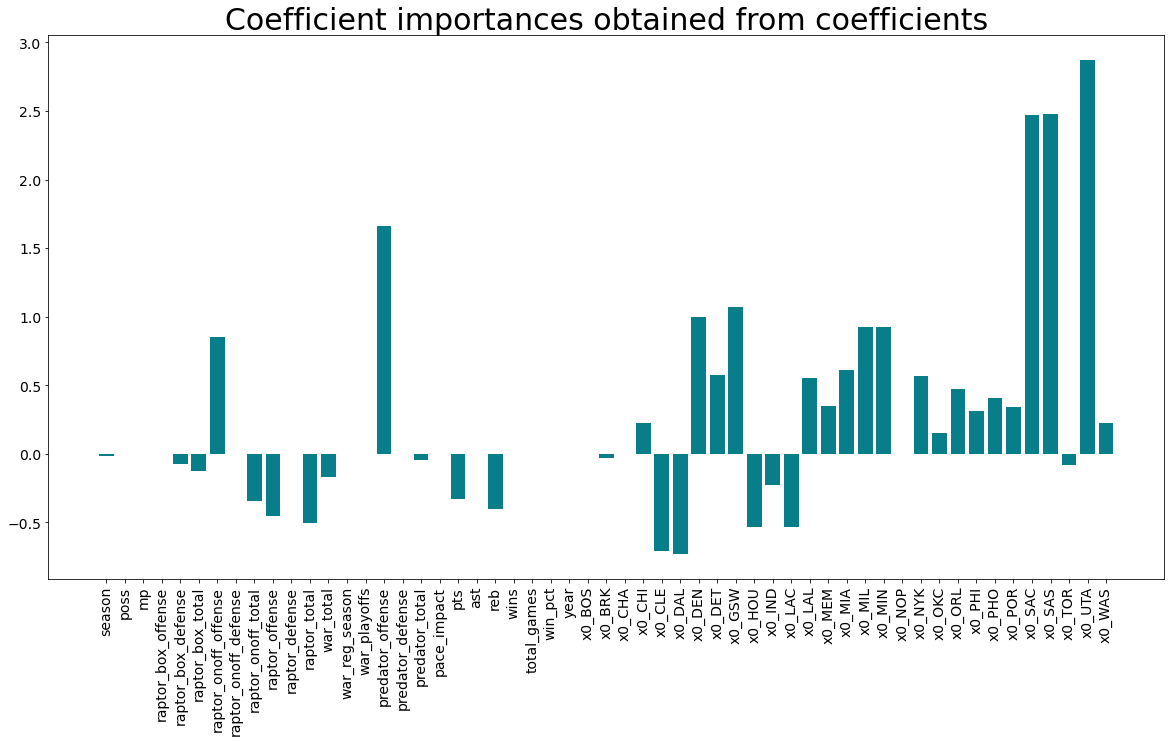

In [346]:
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(x=coef_df['features'], height=coef_df['coefs'], color='#087E8B')
plt.title('Coefficient importances obtained from coefficients', size=30)
plt.xticks(rotation='vertical')
plt.show()

In [224]:
yproba = final_pipe1.predict_proba(X_test)

In [225]:
testproba = final_pipe1.predict_proba(test_df)

In [226]:
test_df.shape

(427, 29)

In [227]:
test_df.reset_index(inplace = True)

In [251]:
test_df

,index,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,predict_probas
0,1,Precious Achiuwa,2022,RS,TOR,3482,1725,-2.440797,2.028669,-0.412127,-2.003025,3.339821,1.336796,-2.516108,2.410593,-0.105515,2.309611,2.309611,0.0,-2.348484,2.251909,-0.096575,-0.764250,8.750000,1.333333,7.000000,7.0,12.0,0.583333,2023.0,"[0.9999999999940296, 5.970420133006612e-12]"
1,3,Steven Adams,2022,RS,MEM,4147,1999,0.470690,1.489622,1.960312,6.284896,-2.941525,3.343371,1.684133,0.619227,2.303361,5.140587,5.140587,0.0,1.417837,1.789452,3.207289,-0.257750,6.727273,2.363636,11.727273,8.0,11.0,0.727273,2023.0,"[0.9999995856263497, 4.14373650237115e-07]"
2,5,Bam Adebayo,2022,RS,MIA,3696,1825,-0.444262,3.761821,3.317559,0.705123,4.163776,4.868899,-0.253894,4.034816,3.780922,6.102629,6.102629,0.0,0.374052,3.445849,3.819901,0.355042,17.727273,3.454545,8.090909,4.0,11.0,0.363636,2023.0,"[0.9999999997213672, 2.786327352882872e-10]"
3,6,Santi Aldama,2022,RS,MEM,763,360,-2.582435,-2.419018,-5.001452,-2.713256,1.162842,-1.550414,-2.809477,-1.865065,-4.674543,-0.354748,-0.354748,0.0,-1.643804,-2.281016,-3.924820,0.357553,9.166667,0.916667,6.083333,8.0,12.0,0.666667,2023.0,"[0.9999999999982445, 1.7554333210279702e-12]"
4,9,Nickeil Alexander-Walker,2022,RS,NOP,2717,1317,-1.532182,-1.541437,-3.073619,-2.698631,-1.186979,-3.885610,-1.852401,-1.547347,-3.399748,-0.439614,-0.439614,0.0,-0.700901,-1.523140,-2.224041,0.693287,3.250000,1.250000,0.750000,6.0,8.0,0.750000,2023.0,"[0.9999999999999907, 9.339182948435482e-15]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,919,McKinley Wright IV,2022,RS,MIN,41,19,0.200348,-7.509459,-7.309111,-6.870536,-10.137379,-17.007916,-1.290293,-8.510070,-9.800363,-0.068195,-0.068195,0.0,-2.485646,-9.368325,-11.853971,-0.218517,2.000000,2.000000,2.000000,1.0,1.0,1.000000,2023.0,"[0.9999999999992558, 7.44213214558806e-13]"
423,924,Thaddeus Young,2022,RS,SAS,788,370,0.307668,-2.249817,-1.942150,-4.828731,2.549229,-2.279503,-0.746809,-1.363910,-2.110719,0.121260,0.121260,0.0,-0.455588,-1.106520,-1.562108,0.480847,2.000000,1.111111,2.555556,4.0,9.0,0.444444,2023.0,"[0.9999999999999927, 7.307678133893823e-15]"
424,925,Thaddeus Young,2022,RS,TOR,964,475,-0.587236,3.274568,2.687332,0.911262,1.273840,2.185103,-0.328231,3.045558,2.717327,1.326680,1.326680,0.0,-0.230479,3.066159,2.835680,0.128361,2.000000,1.111111,2.555556,4.0,9.0,0.444444,2023.0,"[0.9999999999998759, 1.2406978499769178e-13]"
425,927,Trae Young,2022,RS,ATL,5536,2652,7.926036,-2.816709,5.109327,4.483829,-3.860173,0.623655,7.615987,-3.198078,4.417909,9.903858,9.903858,0.0,7.257725,-3.394290,3.863434,2.117038,27.600000,9.400000,3.400000,6.0,10.0,0.600000,2023.0,"[0.9999999322600106, 6.773998939257826e-08]"


In [266]:
test_df1 = test_df['predict_probas'] = pd.Series(testproba.tolist())

In [269]:
# sort column 'predict probas' in descending order
test_mvps = test_df.sort_values(by='predict_probas', ascending=True).head()
test_mvps

,index,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,predict_probas
206,452,Nikola Jokic,2022,RS,DEN,5130,2476,8.661507,6.145971,14.807478,7.640221,3.763933,11.404154,8.869091,5.996284,14.865375,22.693872,22.693872,0.0,8.977276,5.751404,14.728680,1.982546,21.181818,9.000000,9.909091,8.0,11.0,0.727273,2023.0,"[0.00027034108585755057, 0.9997296589141424]"
10,21,Giannis Antetokounmpo,2022,RS,MIL,4735,2204,5.903315,1.870157,7.773472,3.274474,2.399000,5.673474,5.668302,2.079336,7.747638,12.004108,12.004108,0.0,5.152616,1.603849,6.756465,1.691924,31.777778,5.333333,12.222222,8.0,9.0,0.888889,2023.0,"[0.1332759310073478, 0.8667240689926522]"
95,222,Luka Doncic,2022,RS,DAL,4611,2301,6.358754,0.583558,6.942313,1.375561,-2.039442,-0.663882,5.683603,0.041984,5.725587,10.090225,10.090225,0.0,5.838384,0.425840,6.264224,1.408453,34.800000,8.100000,8.200000,6.0,10.0,0.600000,2023.0,"[0.9999373358313904, 6.26641686095833e-05]"
177,381,Jrue Holiday,2022,RS,MIL,4652,2207,2.882086,2.039299,4.921385,7.307521,-0.618146,6.689376,3.942350,1.597107,5.539457,9.344539,9.344539,0.0,3.735919,1.497683,5.233603,0.112667,19.600000,7.900000,5.700000,9.0,10.0,0.900000,2023.0,"[0.999944897468515, 5.5102531485004426e-05]"
380,807,Jayson Tatum,2022,RS,BOS,5583,2731,4.291395,1.348547,5.639942,6.046490,3.682936,9.729427,4.847832,1.865881,6.713713,13.203853,13.203853,0.0,4.878482,1.613222,6.491704,0.132937,31.181818,4.090909,6.909091,8.0,11.0,0.727273,2023.0,"[0.999967252828487, 3.274717151302796e-05]"


In [255]:
#Turn preds into series
b = []
for x in yproba:
    b.append(list(x))
    

#Probability series 
probaseries= pd.Series(b)

#Prediction series 
predseries= pd.Series(ypred)

In [256]:
ydf = pd.concat([y_train, y_test],0)
pred_df = pd.concat([X_train,X_test],0)

pred_df =pd.concat([pred_df,ydf],1)

preds_all = final_pipe1.predict(pred_df)

In [257]:
pred_df.reset_index(inplace = True)

In [258]:
preds_all = pd.Series(preds_all)

preds_df = pd.concat([pred_df, preds_all],1)

In [259]:
preds_df.loc[preds_df['mvp'] != preds_df[0], 'preds'] = 'incorrect'
preds_df.loc[preds_df['mvp'] == preds_df[0], 'preds'] = 'correct'
preds_df.loc[(preds_df['mvp'] == 1) & (preds_df[0]==1), 'preds'] = 'mvp correct'

In [260]:
false_mvp = preds_df[preds_df['preds'] == 'incorrect']
false_mvp

,index,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp,0,preds
348,2712,James Harden,2020,RS,HOU,5330,2483,9.810578,1.113252,10.923829,1.700370,3.670190,5.370560,8.745625,1.704375,10.450000,16.705593,16.705593,0.0,8.441963,2.286450,10.728413,-0.100863,34.338235,7.529412,6.558824,43.0,68.0,0.632353,2020.0,0.0,1.0,incorrect
980,2706,James Harden,2017,RS,HOU,6221,2947,8.531692,-0.552699,7.978993,3.662259,-1.679875,1.982384,7.940983,-0.826352,7.114631,15.199102,15.199102,0.0,8.795082,-0.986247,7.808835,2.427410,29.086420,11.197531,8.135802,54.0,81.0,0.666667,2017.0,0.0,1.0,incorrect
1326,1585,Stephen Curry,2017,RS,GSW,5676,2638,7.834434,-0.613234,7.221200,10.146329,1.811444,11.957773,8.652861,-0.203339,8.449522,15.619612,15.619612,0.0,9.372877,0.560433,9.933310,3.553674,25.303797,6.632911,4.468354,65.0,79.0,0.822785,2017.0,0.0,1.0,incorrect
1407,2710,James Harden,2019,RS,HOU,5857,2867,10.413689,1.713256,12.126945,4.773097,-1.601385,3.171711,9.815956,1.121363,10.937320,20.057946,20.057946,0.0,10.864945,1.477620,12.342565,0.187883,36.128205,7.512821,6.641026,51.0,78.0,0.653846,2019.0,0.0,1.0,incorrect
3230,2540,Draymond Green,2016,RS,GSW,5975,2808,2.821658,4.456953,7.278611,8.821998,7.046082,15.868080,4.153502,5.213447,9.366949,17.817424,17.817424,0.0,4.866201,5.193751,10.059953,2.578934,13.962963,7.382716,9.493827,73.0,81.0,0.901235,2016.0,0.0,1.0,incorrect
3494,4740,Greg Monroe,2019,RS,BOS,9,5,50.561522,-0.898350,49.663172,33.558389,-3.764404,29.793985,50.003924,-1.557255,48.446669,0.128031,0.128031,0.0,33.873087,-2.735141,31.137946,-2.007067,5.348837,0.558140,4.000000,28.0,43.0,0.651163,2019.0,0.0,1.0,incorrect
3833,6939,Russell Westbrook,2017,RS,OKC,5860,2802,7.570143,-1.468145,6.101998,6.177250,-0.063180,6.114070,7.803999,-1.272230,6.531769,13.816333,13.816333,0.0,7.989260,-1.132685,6.856575,4.045869,31.580247,10.370370,10.666667,46.0,81.0,0.567901,2017.0,1.0,0.0,incorrect
4068,1991,Joel Embiid,2022,RS,PHI,4640,2297,4.243889,3.752026,7.995915,3.067727,3.005761,6.073487,4.220412,3.799734,8.020146,12.695724,12.695724,0.0,4.208803,4.221775,8.430578,0.585294,30.573529,4.176471,11.705882,45.0,68.0,0.661765,2022.0,0.0,1.0,incorrect
4197,223,Giannis Antetokounmpo,2022,RS,MIL,4735,2204,5.903315,1.870157,7.773472,3.274474,2.399000,5.673474,5.668302,2.079336,7.747638,12.004108,12.004108,0.0,5.152616,1.603849,6.756465,1.691924,29.880597,5.791045,11.611940,45.0,67.0,0.671642,2022.0,0.0,1.0,incorrect
4526,3593,Nikola Jokic,2019,RS,DEN,5133,2504,5.792122,2.256108,8.048230,3.608477,-0.558603,3.049874,5.642959,1.762307,7.405266,13.031302,13.031302,0.0,6.056080,2.421618,8.477699,0.451961,20.050000,7.250000,10.812500,53.0,80.0,0.662500,2019.0,0.0,1.0,incorrect


In [261]:
true_mvp = preds_df[preds_df['preds'] == 'mvp correct']
true_mvp

,index,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp,0,preds
1020,217,Giannis Antetokounmpo,2019,RS,MIL,5171,2358,4.601266,2.164171,6.765438,1.703340,3.784819,5.488159,4.184342,2.567988,6.752330,11.572533,11.572533,0.0,4.257098,2.499310,6.756409,1.254684,27.694444,5.888889,12.472222,56.0,72.0,0.777778,2019.0,1.0,1.0,mvp correct
1215,1581,Stephen Curry,2015,RS,GSW,5524,2613,8.916145,1.851514,10.767659,9.792626,3.536520,13.329146,9.472839,2.259681,11.732520,19.914785,19.914785,0.0,9.826624,2.687538,12.514162,3.016670,23.750000,7.737500,4.262500,67.0,80.0,0.837500,2015.0,1.0,1.0,mvp correct
1288,3597,Nikola Jokic,2021,RS,DEN,5087,2488,8.566732,1.966245,10.532978,8.417430,-5.128579,3.288851,8.964776,0.589788,9.554564,15.756031,15.756031,0.0,9.346850,0.972368,10.319218,0.885007,26.361111,8.319444,10.833333,47.0,72.0,0.652778,2021.0,1.0,1.0,mvp correct
2595,219,Giannis Antetokounmpo,2020,RS,MIL,4292,1917,5.691956,3.007846,8.699803,3.196904,6.699500,9.896404,5.464958,3.873296,9.338254,12.031285,12.031285,0.0,5.355738,3.172082,8.527820,1.799126,29.476190,5.619048,13.587302,51.0,63.0,0.809524,2020.0,1.0,1.0,mvp correct
2675,2708,James Harden,2018,RS,HOU,5224,2551,9.999814,1.493935,11.493749,3.307226,-0.414159,2.893067,9.127370,1.151305,10.278675,17.048015,17.048015,0.0,9.910777,1.079184,10.989961,0.531938,30.430556,8.750000,5.402778,59.0,72.0,0.819444,2018.0,1.0,1.0,mvp correct
4821,1915,Kevin Durant,2014,RS,OKC,6344,3122,7.705664,-0.371664,7.334000,5.311288,-0.960082,4.351206,7.638684,-0.552202,7.086482,16.010432,16.010432,0.0,7.349493,-0.387499,6.961994,2.096353,32.012346,5.493827,7.382716,58.0,81.0,0.716049,2014.0,1.0,1.0,mvp correct
4908,3599,Nikola Jokic,2022,RS,DEN,5130,2476,8.661507,6.145971,14.807478,7.640221,3.763933,11.404154,8.869091,5.996284,14.865375,22.693872,22.693872,0.0,8.977276,5.751404,14.728680,1.982546,27.081081,7.891892,13.770270,46.0,74.0,0.621622,2022.0,1.0,1.0,mvp correct
5015,1583,Stephen Curry,2016,RS,GSW,5780,2700,11.075536,2.219631,13.295166,8.987145,4.477085,13.464230,11.072301,2.789798,13.862099,23.659318,23.659318,0.0,11.770319,3.284836,15.055155,3.311178,30.063291,6.670886,5.443038,71.0,79.0,0.898734,2016.0,1.0,1.0,mvp correct


In [262]:
data1 = pd.concat([X_test, y_test],1)
data1.reset_index(inplace = True)
data1 = pd.concat([data1, predseries, probaseries],1)

In [263]:
data1.loc[(data1['mvp']== 1)].head()

,index,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp,0,1
656,6939,Russell Westbrook,2017,RS,OKC,5860,2802,7.570143,-1.468145,6.101998,6.177250,-0.063180,6.114070,7.803999,-1.272230,6.531769,13.816333,13.816333,0.0,7.989260,-1.132685,6.856575,4.045869,31.580247,10.370370,10.666667,46.0,81.0,0.567901,2017.0,1.0,0.0,"[0.5099579867830846, 0.49004201321691543]"
1644,1915,Kevin Durant,2014,RS,OKC,6344,3122,7.705664,-0.371664,7.334000,5.311288,-0.960082,4.351206,7.638684,-0.552202,7.086482,16.010432,16.010432,0.0,7.349493,-0.387499,6.961994,2.096353,32.012346,5.493827,7.382716,58.0,81.0,0.716049,2014.0,1.0,1.0,"[0.40641323733410795, 0.593586762665892]"
1731,3599,Nikola Jokic,2022,RS,DEN,5130,2476,8.661507,6.145971,14.807478,7.640221,3.763933,11.404154,8.869091,5.996284,14.865375,22.693872,22.693872,0.0,8.977276,5.751404,14.728680,1.982546,27.081081,7.891892,13.770270,46.0,74.0,0.621622,2022.0,1.0,1.0,"[5.2149525808786734e-08, 0.9999999478504742]"
1838,1583,Stephen Curry,2016,RS,GSW,5780,2700,11.075536,2.219631,13.295166,8.987145,4.477085,13.464230,11.072301,2.789798,13.862099,23.659318,23.659318,0.0,11.770319,3.284836,15.055155,3.311178,30.063291,6.670886,5.443038,71.0,79.0,0.898734,2016.0,1.0,1.0,"[5.450826967567934e-07, 0.9999994549173032]"


In [264]:
data1.loc[data1['player_name'] == 'Nikola Jokic']

,index,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp,0,1
481,3595,Nikola Jokic,2020,RS,DEN,4716,2336,4.438528,0.745225,5.183753,3.026268,0.773469,3.799737,4.359803,0.793856,5.153659,9.380334,9.380334,0.0,5.214213,2.045063,7.259276,-0.427736,19.945205,7.013699,9.739726,46.0,73.0,0.630137,2020.0,0.0,0.0,"[0.9888183955493685, 0.011181604450631499]"
1349,3593,Nikola Jokic,2019,RS,DEN,5133,2504,5.792122,2.256108,8.048230,3.608477,-0.558603,3.049874,5.642959,1.762307,7.405266,13.031302,13.031302,0.0,6.056080,2.421618,8.477699,0.451961,20.050000,7.250000,10.812500,53.0,80.0,0.662500,2019.0,0.0,1.0,"[0.07172252280353042, 0.9282774771964696]"
1731,3599,Nikola Jokic,2022,RS,DEN,5130,2476,8.661507,6.145971,14.807478,7.640221,3.763933,11.404154,8.869091,5.996284,14.865375,22.693872,22.693872,0.0,8.977276,5.751404,14.728680,1.982546,27.081081,7.891892,13.770270,46.0,74.0,0.621622,2022.0,1.0,1.0,"[5.2149525808786734e-08, 0.9999999478504742]"


In [265]:
data1.loc[(data1['year'] ==2017)& (data1['mvp'] ==1)]

,index,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp,0,1
656,6939,Russell Westbrook,2017,RS,OKC,5860,2802,7.570143,-1.468145,6.101998,6.17725,-0.06318,6.11407,7.803999,-1.27223,6.531769,13.816333,13.816333,0.0,7.98926,-1.132685,6.856575,4.045869,31.580247,10.37037,10.666667,46.0,81.0,0.567901,2017.0,1.0,0.0,"[0.5099579867830846, 0.49004201321691543]"


## Notes on Model 1

- First model gives us an amazing score on our accuracy of the model which is at 99%.
- Recall is the main metric we want to focus on in which we want to have the least amount of false negatives as possible. Even though we're not focusing on false positives we still want to have that number low as well. 75% score on recall isn't terrible but will try to improve as we go on.
- The column importance showed that when we one hot encoded the team names, somehow they became important to determining an MVP. This must mean that the team you play on and the performance of the team as a whole can be vital to a player winning the award. 
- The model also shown that out of the 9 MVPs that are in the data set, the model predicted 8 of them to be correct. That means the model predicted 88% of the MVPs correct which is a very good start and could very well be the model we end up with after all is said and done. 

# Model 2 - PCA with Undersampling

In [270]:
# Instantiate final pipe for Model #2
final_pipe2 = Pipeline([('preprocess', ct),
                        ('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                       (('pca', PCA(n_components = 3))),               #Use for imbalance purposes
                       #('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('model', LogisticRegression(random_state = 42))])

final_pipe2

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ohepipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['team']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['season', 'poss', 'mp', 'raptor_box_offense', 'raptor_box_defense',
       'raptor_box_total', 'raptor_onoff_off...
       '

0.9833175952156122
0.9797074091552619


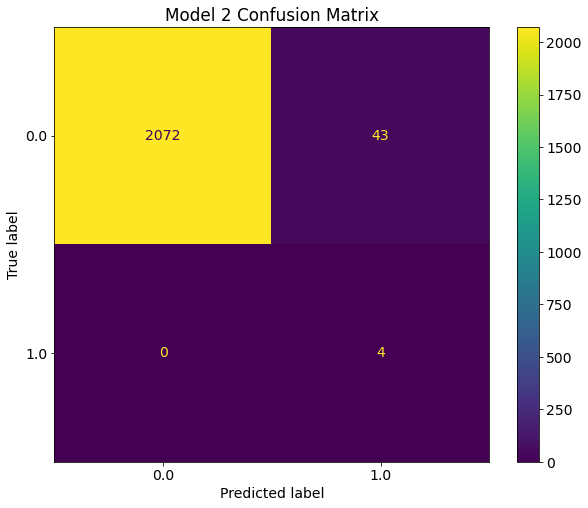

In [271]:
# Fit the model
final_pipe2.fit(X_train,y_train)

#Print scores from model
print(final_pipe2.score(X_train,y_train))
print(final_pipe2.score(X_test,y_test))

#Predict model #2
ypred2 = final_pipe2.predict(X_test)

#plot confusion matrix 
fig, ax = plt.subplots(figsize = (10, 8))
plt.rcParams.update({'font.size': 14})
ax.set_title('Model 2 Confusion Matrix')
plot_confusion_matrix(final_pipe2, X_test, y_test, ax=ax);

- The model shows that it predicted every MVP in the data set correctly, however the 43 false positives are too much compared to the last model. 

In [273]:
model2_accuracy = accuracy_score(y_test, ypred2)
model2_accuracy

print('Model 2 Accuracy Score:', model2_accuracy)

Model 2 Accuracy Score: 0.9797074091552619


In [274]:
print(classification_report(y_test, ypred2, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.09      1.00      0.16         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.09      1.00      0.16         4
   macro avg       0.03      0.33      0.05         4
weighted avg       0.09      1.00      0.16         4



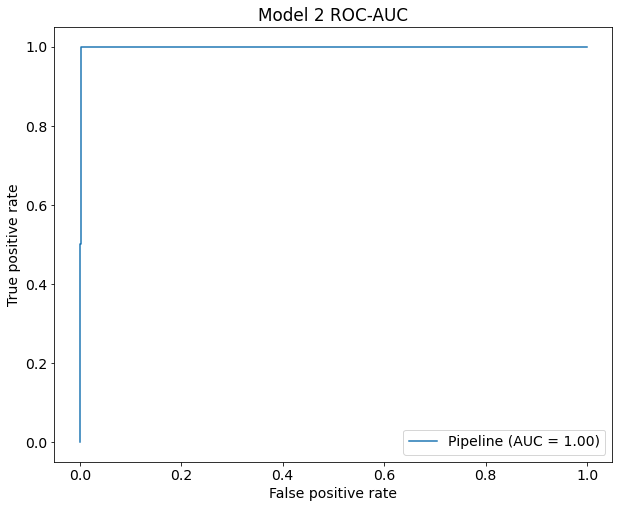

In [275]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(final_pipe2, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 2 ROC-AUC')
plt.show()

In [281]:
X_train.columns

Index(['player_name', 'season', 'season_type', 'team', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact', 'pts', 'ast',
       'reb', 'wins', 'total_games', 'win_pct', 'year'],
      dtype='object')

In [280]:
test_df.columns

Index(['index', 'player_name', 'season', 'season_type', 'team', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact', 'pts', 'ast',
       'reb', 'wins', 'total_games', 'win_pct', 'year', 'predict_probas'],
      dtype='object')

In [282]:
test_df.reset_index(inplace = True)

In [352]:
test_df.columns

Index(['player_name', 'season', 'season_type', 'team', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact', 'pts', 'ast',
       'reb', 'wins', 'total_games', 'win_pct', 'year'],
      dtype='object')

In [353]:
testproba2 = final_pipe2.predict_proba(test_df)

In [354]:
testpred2 = final_pipe2.predict(test_df)

In [355]:
# Predict probability on X_test
yproba2 = final_pipe2.predict_proba(X_test)

#create a function that appends probabilities to a list 
c = []
for x in yproba2:
    c.append(list(x))

#Probability series 
probaseries= pd.Series(c)

#Prediction series 
predseries= pd.Series(ypred2)

In [356]:
ydf2 = pd.concat([y_train, y_test],0)
pred_df2 = pd.concat([X_train,X_test],0)

pred_df2 = pd.concat([pred_df2,ydf2],1)

preds_all2 = final_pipe2.predict(pred_df2)

In [357]:
pred_df2.reset_index(inplace = True)

In [358]:
preds_all2 = pd.Series(preds_all2)

preds_df2 = pd.concat([pred_df2, preds_all2],1)

In [359]:
preds_df2.loc[preds_df2['mvp'] != preds_df2[0], 'preds'] = 'incorrect'
preds_df2.loc[preds_df2['mvp'] == preds_df2[0], 'preds'] = 'correct'
preds_df2.loc[(preds_df2['mvp'] == 1) & (preds_df2[0]==1), 'preds'] = 'mvp correct'

In [360]:
false_mvp2 = preds_df2[preds_df2['preds'] == 'incorrect']
false_mvp2

,index,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp,0,preds
343,5340,Chris Paul,2015,RS,LAC,5726,2857,7.253170,2.337110,9.590280,12.076298,0.310872,12.387170,8.537597,2.057696,10.595293,19.418015,19.418015,0.0,8.796529,2.193660,10.990189,-0.170750,19.073171,10.219512,4.585366,56.0,82.0,0.682927,2015.0,0.0,1.0,incorrect
348,2712,James Harden,2020,RS,HOU,5330,2483,9.810578,1.113252,10.923829,1.700370,3.670190,5.370560,8.745625,1.704375,10.450000,16.705593,16.705593,0.0,8.441963,2.286450,10.728413,-0.100863,34.338235,7.529412,6.558824,43.0,68.0,0.632353,2020.0,0.0,1.0,incorrect
361,3050,Jrue Holiday,2018,RS,NOP,6235,2927,2.092656,0.953135,3.045791,2.229772,6.325804,8.555576,2.226107,2.129362,4.355469,10.708487,10.708487,0.0,2.464318,2.509951,4.974269,0.911441,18.975309,6.000000,4.506173,47.0,81.0,0.580247,2018.0,0.0,1.0,incorrect
362,4029,Kawhi Leonard,2020,RS,LAC,3871,1848,6.045196,2.919503,8.964700,6.587094,3.990303,10.577397,6.471693,3.279396,9.751089,11.730348,11.730348,0.0,6.505279,3.762903,10.268182,-0.487696,27.070175,4.912281,7.052632,41.0,57.0,0.719298,2020.0,0.0,1.0,incorrect
565,1579,Stephen Curry,2014,RS,GSW,5819,2846,6.757537,0.700927,7.458465,9.131566,-0.430128,8.701438,7.609201,0.456968,8.066169,16.093224,16.093224,0.0,7.852722,1.007301,8.860024,2.368535,24.012821,8.538462,4.282051,50.0,78.0,0.641026,2014.0,0.0,1.0,incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,4020,Kawhi Leonard,2015,RS,SAS,4039,2033,3.445632,5.091294,8.536925,3.909967,4.355617,8.265584,3.698909,5.190822,8.889731,12.113722,12.113722,0.0,3.535727,5.979349,9.515075,0.322217,16.515625,2.515625,7.203125,46.0,64.0,0.718750,2015.0,0.0,1.0,incorrect
5217,4185,Kyle Lowry,2018,RS,TOR,5196,2510,5.492891,0.664048,6.156939,0.801599,1.134972,1.936571,4.770625,0.771181,5.541806,10.730099,10.730099,0.0,5.378993,1.132219,6.511212,1.042509,16.243590,6.884615,5.564103,57.0,78.0,0.730769,2018.0,0.0,1.0,incorrect
5224,5023,Joakim Noah,2014,RS,CHI,5340,2820,0.907720,5.113991,6.021711,3.127361,0.957830,4.085191,1.467580,4.477997,5.945577,12.461590,12.461590,0.0,1.059123,4.852262,5.911385,-0.377909,12.587500,5.387500,11.250000,48.0,80.0,0.600000,2014.0,0.0,1.0,incorrect
5231,6854,John Wall,2017,RS,WAS,5886,2836,4.178782,-0.955717,3.223065,4.765712,-0.375347,4.390366,4.445788,-0.871646,3.574143,9.299071,9.299071,0.0,4.603284,-0.632123,3.971161,1.591833,23.141026,10.653846,4.179487,48.0,78.0,0.615385,2017.0,0.0,1.0,incorrect


In [361]:
true_mvp2 = preds_df2[preds_df2['preds'] == 'mvp correct']
true_mvp2

,index,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp,0,preds
1020,217,Giannis Antetokounmpo,2019,RS,MIL,5171,2358,4.601266,2.164171,6.765438,1.703340,3.784819,5.488159,4.184342,2.567988,6.752330,11.572533,11.572533,0.0,4.257098,2.499310,6.756409,1.254684,27.694444,5.888889,12.472222,56.0,72.0,0.777778,2019.0,1.0,1.0,mvp correct
1215,1581,Stephen Curry,2015,RS,GSW,5524,2613,8.916145,1.851514,10.767659,9.792626,3.536520,13.329146,9.472839,2.259681,11.732520,19.914785,19.914785,0.0,9.826624,2.687538,12.514162,3.016670,23.750000,7.737500,4.262500,67.0,80.0,0.837500,2015.0,1.0,1.0,mvp correct
1288,3597,Nikola Jokic,2021,RS,DEN,5087,2488,8.566732,1.966245,10.532978,8.417430,-5.128579,3.288851,8.964776,0.589788,9.554564,15.756031,15.756031,0.0,9.346850,0.972368,10.319218,0.885007,26.361111,8.319444,10.833333,47.0,72.0,0.652778,2021.0,1.0,1.0,mvp correct
2595,219,Giannis Antetokounmpo,2020,RS,MIL,4292,1917,5.691956,3.007846,8.699803,3.196904,6.699500,9.896404,5.464958,3.873296,9.338254,12.031285,12.031285,0.0,5.355738,3.172082,8.527820,1.799126,29.476190,5.619048,13.587302,51.0,63.0,0.809524,2020.0,1.0,1.0,mvp correct
2675,2708,James Harden,2018,RS,HOU,5224,2551,9.999814,1.493935,11.493749,3.307226,-0.414159,2.893067,9.127370,1.151305,10.278675,17.048015,17.048015,0.0,9.910777,1.079184,10.989961,0.531938,30.430556,8.750000,5.402778,59.0,72.0,0.819444,2018.0,1.0,1.0,mvp correct
3833,6939,Russell Westbrook,2017,RS,OKC,5860,2802,7.570143,-1.468145,6.101998,6.177250,-0.063180,6.114070,7.803999,-1.272230,6.531769,13.816333,13.816333,0.0,7.989260,-1.132685,6.856575,4.045869,31.580247,10.370370,10.666667,46.0,81.0,0.567901,2017.0,1.0,1.0,mvp correct
4821,1915,Kevin Durant,2014,RS,OKC,6344,3122,7.705664,-0.371664,7.334000,5.311288,-0.960082,4.351206,7.638684,-0.552202,7.086482,16.010432,16.010432,0.0,7.349493,-0.387499,6.961994,2.096353,32.012346,5.493827,7.382716,58.0,81.0,0.716049,2014.0,1.0,1.0,mvp correct
4908,3599,Nikola Jokic,2022,RS,DEN,5130,2476,8.661507,6.145971,14.807478,7.640221,3.763933,11.404154,8.869091,5.996284,14.865375,22.693872,22.693872,0.0,8.977276,5.751404,14.728680,1.982546,27.081081,7.891892,13.770270,46.0,74.0,0.621622,2022.0,1.0,1.0,mvp correct
5015,1583,Stephen Curry,2016,RS,GSW,5780,2700,11.075536,2.219631,13.295166,8.987145,4.477085,13.464230,11.072301,2.789798,13.862099,23.659318,23.659318,0.0,11.770319,3.284836,15.055155,3.311178,30.063291,6.670886,5.443038,71.0,79.0,0.898734,2016.0,1.0,1.0,mvp correct


In [363]:
test_df2 = test_df['predict_probas'] = pd.Series(testproba2.tolist())

In [367]:
# sort column 'predict probas' in descending order
test_mvps2 = test_df.sort_values(by='predict_probas', ascending=True).head()
test_mvps2

,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,predict_probas
206,Dewayne Dedmon,2022,RS,MIA,2182,1065,-2.473230,1.247564,-1.225667,-0.889926,-0.035924,-0.925850,-2.323484,0.991470,-1.332013,0.768358,0.768358,0.0,-2.353996,0.605540,-1.748455,-0.275619,5.555556,0.666667,3.444444,4.0,9.0,0.444444,2023.0,"[0.0011689422858927045, 0.9988310577141073]"
10,Nickeil Alexander-Walker,2022,RS,UTA,308,149,-2.288792,1.303682,-0.985110,-0.008950,0.584212,0.575261,-2.040163,1.182940,-0.857223,0.144739,0.144739,0.0,-1.741682,0.127620,-1.614061,0.591323,3.250000,1.250000,0.750000,6.0,8.0,0.750000,2023.0,"[0.17554207465649874, 0.8244579253435013]"
425,Justin Jackson,2022,RS,BOS,5,2,0.399319,5.130066,5.529385,-26.189521,-75.136625,-101.326145,-5.252874,-11.309724,-16.562598,-0.014478,-0.014478,0.0,-1.827273,-11.484740,-13.312013,2.723861,2.000000,0.333333,0.333333,2.0,3.0,0.666667,2023.0,"[0.3924554728724746, 0.6075445271275254]"
197,Seth Curry,2022,RS,BRK,1176,569,3.170050,-0.583214,2.586836,2.921567,0.056166,2.977732,3.287861,-0.468421,2.819441,1.613078,1.613078,0.0,3.424486,-0.144706,3.279779,-0.232066,6.750000,2.000000,1.250000,2.0,4.0,0.500000,2023.0,"[0.753250744333746, 0.24674925566625402]"
123,Troy Brown Jr.,2022,RS,CHI,2222,1055,-1.505288,0.179573,-1.325715,-0.676851,-1.719990,-2.396841,-1.415023,-0.178226,-1.593249,0.619990,0.619990,0.0,-1.505996,-0.464563,-1.970560,-0.424637,10.333333,0.888889,5.444444,2.0,9.0,0.222222,2023.0,"[0.7669464271281755, 0.23305357287182446]"


## Notes on Model 2

- Second model gives us a great score on our accuracy of the model which is at 97%, however the predictions aren't as dominant as the origianl model. 
- This model shown to have 0 false negatives which is great but 43 false positives is something that we would like to avoid if possible. There's already a model that has shown to have only 1 false negative but the false positive numbers are way less. We got a perfect score on our recall which is great.
- The model also shown that out of the 9 MVPs that are in the data set, the model predicted 9 of them to be correct. That means the model predicted 100% of the MVPs correct which is great but the test mvps which is the focal point of the project to try to predict who will be MVP this year are producing names that dont match up with the numbers. So this model is not a good model even though the scores are great. 

# Model 3 - Decision Tree with Oversampling

In [381]:
#Instantiate final pipe for model #3
final_pipe3 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                       #(('smote', SMOTE(sampling_strategy='minority'))),               #Use for imbalance purposes
                       ('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('dt_clf', DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 42))])

0.9990557129367328
0.9924492685228882


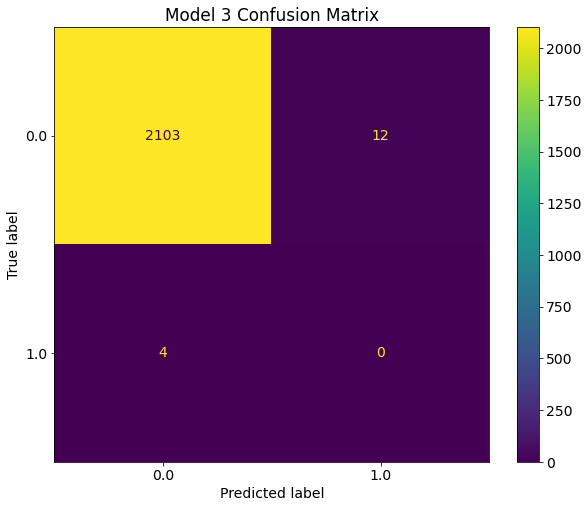

In [382]:
# Fit the model
final_pipe3.fit(X_train,y_train)

#Print scores from model #3
print(final_pipe3.score(X_train,y_train))
print(final_pipe3.score(X_test,y_test))

#Predict model #3
ypred3 = final_pipe3.predict(X_test)

#plot confusion matrix 
fig, ax = plt.subplots(figsize = (10, 8))
plt.rcParams.update({'font.size': 14})
ax.set_title('Model 3 Confusion Matrix')
plot_confusion_matrix(final_pipe3, X_test, y_test, ax=ax);

In [383]:
model3_accuracy = accuracy_score(y_test, ypred3)
model3_accuracy

print('Model 3 Accuracy Score:', model3_accuracy)

Model 3 Accuracy Score: 0.9924492685228882


In [384]:
print(classification_report(y_test, ypred3, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         4
   macro avg       0.00      0.00      0.00         4
weighted avg       0.00      0.00      0.00         4



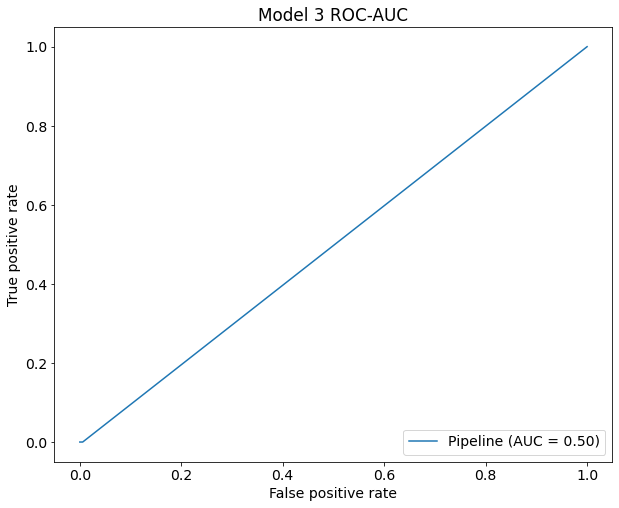

In [385]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(final_pipe3, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 3 ROC-AUC')
plt.show()

In [386]:
onehotcolnames3 = final_pipe3.named_steps['preprocess'].transformers_[0][1]['onehotenc'].get_feature_names().tolist()

In [387]:
features = colsnum + onehotcolnames3

In [389]:
featureimps = final_pipe3.steps[2][1].feature_importances_[0]

coef_df3 = pd.DataFrame({'features': features})

In [390]:
coef_df3.sort_values(by = 'features', ascending = False)

,features
25,year
54,x0_WAS
53,x0_UTA
52,x0_TOR
51,x0_SAS
50,x0_SAC
49,x0_POR
48,x0_PHO
47,x0_PHI
46,x0_ORL


In [433]:
X_train.columns

Index(['player_name', 'season', 'season_type', 'team', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact', 'pts', 'ast',
       'reb', 'wins', 'total_games', 'win_pct', 'year'],
      dtype='object')

In [434]:
test_df.columns

Index(['level_0', 'index', 'player_name', 'season', 'season_type', 'team',
       'poss', 'mp', 'raptor_box_offense', 'raptor_box_defense',
       'raptor_box_total', 'raptor_onoff_offense', 'raptor_onoff_defense',
       'raptor_onoff_total', 'raptor_offense', 'raptor_defense',
       'raptor_total', 'war_total', 'war_reg_season', 'war_playoffs',
       'predator_offense', 'predator_defense', 'predator_total', 'pace_impact',
       'pts', 'ast', 'reb', 'wins', 'total_games', 'win_pct', 'year',
       'predict_probas'],
      dtype='object')

In [435]:
test_df.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

In [429]:
testproba3 = final_pipe3.predict_proba(test_df)

ValueError: Column ordering must be equal for fit and for transform when using the remainder keyword

In [404]:
# Predict probability on X_test
yproba3 = final_pipe3.predict_proba(X_test)

#create a function that appends probabilities to a list 
d = []
for x in yproba3:
    d.append(list(x))

#Probability series 
probaseries= pd.Series(d)

#Prediction series 
predseries= pd.Series(ypred3)

In [405]:
ydf3 = pd.concat([y_train, y_test],0)
pred_df3 = pd.concat([X_train,X_test],0)

pred_df3 = pd.concat([pred_df3,ydf3],1)

preds_all3 = final_pipe3.predict(pred_df3)

In [406]:
pred_df3.reset_index(inplace = True)

In [407]:
preds_all3 = pd.Series(preds_all3)

preds_df3 = pd.concat([pred_df3, preds_all3],1)

In [408]:
preds_df3.loc[preds_df3['mvp'] != preds_df3[0], 'preds'] = 'incorrect'
preds_df3.loc[preds_df3['mvp'] == preds_df3[0], 'preds'] = 'correct'
preds_df3.loc[(preds_df3['mvp'] == 1) & (preds_df3[0]==1), 'preds'] = 'mvp correct'

In [409]:
false_mvp3 = preds_df3[preds_df3['preds'] == 'incorrect']
false_mvp3

,index,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp,0,preds
362,4029,Kawhi Leonard,2020,RS,LAC,3871,1848,6.045196,2.919503,8.964700,6.587094,3.990303,10.577397,6.471693,3.279396,9.751089,11.730348,11.730348,0.0,6.505279,3.762903,10.268182,-0.487696,27.070175,4.912281,7.052632,41.0,57.0,0.719298,2020.0,0.0,1.0,incorrect
928,2542,Draymond Green,2017,RS,GSW,5255,2471,0.855015,6.172973,7.027988,2.318758,4.796214,7.114972,1.142264,6.172132,7.314396,12.892269,12.892269,0.0,2.299036,6.433203,8.732239,1.577421,10.210526,7.013158,7.881579,62.0,76.0,0.815789,2017.0,0.0,1.0,incorrect
2659,3397,LeBron James,2020,RS,LAL,4897,2316,6.224720,-0.422747,5.801973,5.015009,5.473993,10.489001,6.310389,0.741943,7.052332,11.591113,11.591113,0.0,6.355462,0.686145,7.041607,0.074483,25.343284,10.208955,7.835821,50.0,67.0,0.746269,2020.0,0.0,1.0,incorrect
3288,5342,Chris Paul,2016,RS,LAC,4930,2420,6.805986,1.431951,8.237937,8.256671,1.825502,10.082173,7.479055,1.562457,9.041512,14.554872,14.554872,0.0,6.824829,2.652509,9.477338,-0.026301,19.540541,9.972973,4.189189,50.0,74.0,0.675676,2016.0,0.0,1.0,incorrect
3833,6939,Russell Westbrook,2017,RS,OKC,5860,2802,7.570143,-1.468145,6.101998,6.177250,-0.063180,6.114070,7.803999,-1.272230,6.531769,13.816333,13.816333,0.0,7.989260,-1.132685,6.856575,4.045869,31.580247,10.370370,10.666667,46.0,81.0,0.567901,2017.0,1.0,0.0,incorrect
3846,1589,Stephen Curry,2019,RS,GSW,5059,2331,7.156678,-0.094462,7.062216,7.268303,3.677967,10.946270,7.482670,0.672822,8.155492,13.263794,13.263794,0.0,8.486090,0.864722,9.350812,2.311394,27.260870,5.231884,5.347826,52.0,69.0,0.753623,2019.0,0.0,1.0,incorrect
4058,1918,Kevin Durant,2016,RS,OKC,5335,2578,6.289855,-0.583527,5.706329,4.883565,2.311334,7.194899,6.237833,-0.022718,6.215115,11.990727,11.990727,0.0,6.572834,-0.637212,5.935623,1.648549,28.180556,5.013889,8.180556,52.0,72.0,0.722222,2016.0,0.0,1.0,incorrect
4068,1991,Joel Embiid,2022,RS,PHI,4640,2297,4.243889,3.752026,7.995915,3.067727,3.005761,6.073487,4.220412,3.799734,8.020146,12.695724,12.695724,0.0,4.208803,4.221775,8.430578,0.585294,30.573529,4.176471,11.705882,45.0,68.0,0.661765,2022.0,0.0,1.0,incorrect
4092,2538,Draymond Green,2015,RS,GSW,5213,2490,0.761475,4.868508,5.629982,4.113839,4.859603,8.973443,1.460367,5.082012,6.542379,11.979464,11.979464,0.0,2.318012,5.734857,8.052869,1.417050,11.658228,3.683544,8.189873,64.0,79.0,0.810127,2015.0,0.0,1.0,incorrect
4197,223,Giannis Antetokounmpo,2022,RS,MIL,4735,2204,5.903315,1.870157,7.773472,3.274474,2.399000,5.673474,5.668302,2.079336,7.747638,12.004108,12.004108,0.0,5.152616,1.603849,6.756465,1.691924,29.880597,5.791045,11.611940,45.0,67.0,0.671642,2022.0,0.0,1.0,incorrect


In [410]:
true_mvp3 = preds_df3[preds_df3['preds'] == 'mvp correct']
true_mvp3

,index,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp,0,preds
1020,217,Giannis Antetokounmpo,2019,RS,MIL,5171,2358,4.601266,2.164171,6.765438,1.703340,3.784819,5.488159,4.184342,2.567988,6.752330,11.572533,11.572533,0.0,4.257098,2.499310,6.756409,1.254684,27.694444,5.888889,12.472222,56.0,72.0,0.777778,2019.0,1.0,1.0,mvp correct
1215,1581,Stephen Curry,2015,RS,GSW,5524,2613,8.916145,1.851514,10.767659,9.792626,3.536520,13.329146,9.472839,2.259681,11.732520,19.914785,19.914785,0.0,9.826624,2.687538,12.514162,3.016670,23.750000,7.737500,4.262500,67.0,80.0,0.837500,2015.0,1.0,1.0,mvp correct
1288,3597,Nikola Jokic,2021,RS,DEN,5087,2488,8.566732,1.966245,10.532978,8.417430,-5.128579,3.288851,8.964776,0.589788,9.554564,15.756031,15.756031,0.0,9.346850,0.972368,10.319218,0.885007,26.361111,8.319444,10.833333,47.0,72.0,0.652778,2021.0,1.0,1.0,mvp correct
2595,219,Giannis Antetokounmpo,2020,RS,MIL,4292,1917,5.691956,3.007846,8.699803,3.196904,6.699500,9.896404,5.464958,3.873296,9.338254,12.031285,12.031285,0.0,5.355738,3.172082,8.527820,1.799126,29.476190,5.619048,13.587302,51.0,63.0,0.809524,2020.0,1.0,1.0,mvp correct
2675,2708,James Harden,2018,RS,HOU,5224,2551,9.999814,1.493935,11.493749,3.307226,-0.414159,2.893067,9.127370,1.151305,10.278675,17.048015,17.048015,0.0,9.910777,1.079184,10.989961,0.531938,30.430556,8.750000,5.402778,59.0,72.0,0.819444,2018.0,1.0,1.0,mvp correct


# Model 4 - K Nearest Neighbors with Oversampling

In [1924]:
#Instantiate final pipe for model #4
final_pipe4 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                       #(('smote', SMOTE(sampling_strategy='minority'))),               #Use for imbalance purposes
                       ('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('knn', KNeighborsClassifier())])

In [561]:
# Performing a grid search for our knn
knn_params = {'knn__n_neighbors': [3, 5, 7, 9, 11, 13], 'knn__p': [1, 2, 3, 4, 5]}

knn_grid = GridSearchCV(estimator = final_pipe4, param_grid = knn_params, scoring = 'recall', cv = 5)


In [562]:
# Fitting the training data
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('ohepipe',
                                                                         Pipeline(steps=[('onehotenc',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('onehotnorm',
                                                                                          MaxAbsScaler())]),
                                                                         ['team']),
                                                                        ('numpipe',
                                                                         Pipeline(steps=[('numnorm',
                    

In [563]:
# Looking at the best parameters as a result of the grid search
knn_grid.best_params_

{'knn__n_neighbors': 13, 'knn__p': 3}

In [564]:
# Create new pipeline that now has new parameters 
final_pipe4 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                       #(('smote', SMOTE(sampling_strategy='minority'))),               #Use for imbalance purposes
                       ('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('knn', KNeighborsClassifier(n_neighbors = 13, p = 3))])


In [565]:
# Fitting the training data with the updated pipeline
final_pipe4.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ohepipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['team']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['season', 'poss', 'mp', 'raptor_box_offense', 'raptor_box_defense',
       'raptor_box_total', 'raptor_onoff_off...
       '

In [566]:
# Calculating y predictions
ypred4 = final_pipe4.predict(X_test)

In [616]:
predseries = pd.Series(ypred4)

In [621]:
data1 = pd.concat([X_test, y_test],1)
data1.reset_index(inplace = True)
data1 = pd.concat([data1, predseries],1)


In [625]:
data1.loc[data1['mvp'] != data1[0]]

,index,player_name,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,pts,ast,reb,wins,total_games,win_pct,year,mvp,0
153,1580,Stephen Curry,2015,PO,GSW,1668,826,7.143250,1.099762,8.243013,-1.304581,10.319199,9.014618,5.713215,3.025837,8.739052,5.175088,0.000000,5.175088,5.347108,2.556067,7.903175,3.506650,23.750000,7.737500,4.262500,67.0,80.0,0.837500,2015.0,1.0,0.0
165,214,Giannis Antetokounmpo,2018,PO,MIL,546,280,5.043573,0.739883,5.783456,1.988337,-2.701287,-0.712950,4.671864,0.082586,4.754450,1.118076,0.000000,1.118076,7.142995,-0.874951,6.268045,1.093964,26.853333,4.813333,10.040000,39.0,75.0,0.520000,2018.0,0.0,1.0
421,4090,Damian Lillard,2021,PO,POR,498,248,15.464571,3.413589,18.878160,16.282042,10.948163,27.230206,16.329350,5.258404,21.587755,3.261990,0.000000,3.261990,12.515026,3.903481,16.418507,2.655016,28.776119,7.537313,4.223881,39.0,67.0,0.582090,2021.0,0.0,1.0
556,1579,Stephen Curry,2014,RS,GSW,5819,2846,6.757537,0.700927,7.458465,9.131566,-0.430128,8.701438,7.609201,0.456968,8.066169,16.093224,16.093224,0.000000,7.852722,1.007301,8.860024,2.368535,24.012821,8.538462,4.282051,50.0,78.0,0.641026,2014.0,0.0,1.0
797,1794,Luka Doncic,2020,PO,DAL,458,215,6.876522,-2.418318,4.458203,-4.661322,3.006089,-1.655233,4.849689,-1.372220,3.477469,0.707947,0.000000,0.707947,4.581433,-1.229366,3.352067,0.481427,28.836066,8.819672,9.393443,36.0,61.0,0.590164,2020.0,0.0,1.0
921,2706,James Harden,2017,RS,HOU,6221,2947,8.531692,-0.552699,7.978993,3.662259,-1.679875,1.982384,7.940983,-0.826352,7.114631,15.199102,15.199102,0.000000,8.795082,-0.986247,7.808835,2.427410,29.086420,11.197531,8.135802,54.0,81.0,0.666667,2017.0,0.0,1.0
960,3592,Nikola Jokic,2019,PO,DEN,1086,557,8.772971,5.440109,14.213081,3.739595,10.995599,14.735194,8.147190,6.929839,15.077029,5.166310,0.000000,5.166310,4.970388,6.595480,11.565868,-1.116413,20.050000,7.250000,10.812500,53.0,80.0,0.662500,2019.0,0.0,1.0
1338,4180,Kyle Lowry,2016,PO,TOR,1442,766,1.974038,-0.039851,1.934187,13.706082,5.414358,19.120441,4.561118,1.105751,5.666869,3.375721,0.000000,3.375721,4.846199,1.495431,6.341630,-0.472615,21.220779,6.415584,4.740260,54.0,77.0,0.701299,2016.0,0.0,1.0
1522,1925,Kevin Durant,2021,PO,BRK,981,485,4.674534,3.086586,7.761120,-10.423676,-3.591697,-14.015373,1.666369,1.819533,3.485902,1.620504,0.000000,1.620504,2.053163,1.805946,3.859109,1.790901,26.942857,5.571429,7.057143,23.0,35.0,0.657143,2021.0,0.0,1.0
1548,1917,Kevin Durant,2016,PO,OKC,1471,726,2.309173,-1.094325,1.214848,4.165455,4.296170,8.461625,2.762823,-0.097776,2.665047,2.106501,0.000000,2.106501,6.087921,-0.154367,5.933555,1.739532,28.180556,5.013889,8.180556,52.0,72.0,0.722222,2016.0,0.0,1.0


In [627]:
yproba4 = final_pipe4.predict_proba(X_test)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


0.9942004971002486
0.992430613961312


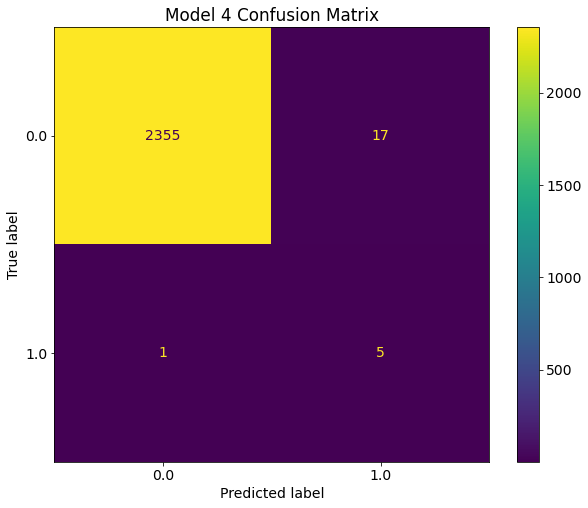

In [567]:
#Print scores from model #4
print(final_pipe4.score(X_train,y_train))
print(final_pipe4.score(X_test,y_test))

#plot confusion matrix 
fig, ax = plt.subplots(figsize = (10, 8))
plt.rcParams.update({'font.size': 14})
ax.set_title('Model 4 Confusion Matrix')
plot_confusion_matrix(final_pipe4, X_test, y_test, ax=ax);

In [568]:
model4_recall = recall_score(y_test, ypred4)
model4_recall

print('Model 4 Recall Score:', model4_recall)

Model 4 Recall Score: 0.8333333333333334


In [569]:
print(classification_report(y_test, ypred4, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.23      0.83      0.36         6
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.23      0.83      0.36         6
   macro avg       0.08      0.28      0.12         6
weighted avg       0.23      0.83      0.36         6



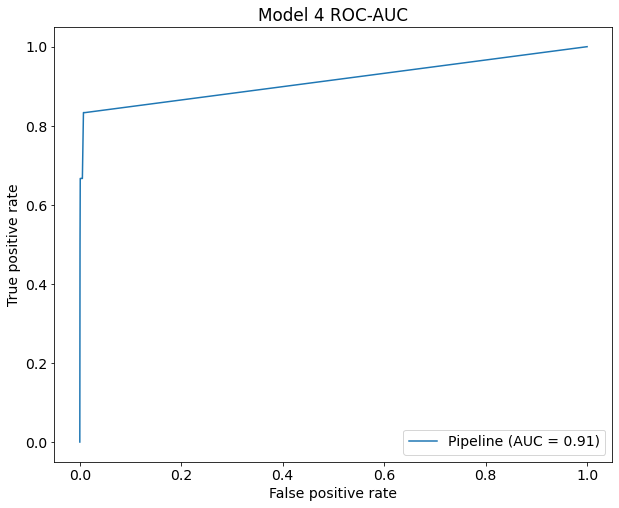

In [570]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(final_pipe4, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 4 ROC-AUC')
plt.show()

# Model 5 - Random Forest with SMOTE

In [571]:
# Create new pipeline for Random Forest
final_pipe5 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                       (('smote', SMOTE(sampling_strategy='minority', random_state = 42))),               #Use for imbalance purposes
                       #('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('forest', RandomForestClassifier(random_state = 42))])


In [572]:
# Performing a grid search for our random forest
rf_params = param_grid = {'forest__criterion': ['gini', 'entropy'], 
                          'forest__n_estimators': [50, 150, 200], 
                          'forest__min_samples_leaf': [2, 5, 20, 50],
                         'forest__max_depth': [3, 5, 7]}

rf_grid_pipeline = GridSearchCV(estimator = final_pipe5, param_grid = rf_params, scoring = 'recall', cv = 5)

In [573]:
# Fitting the training data
rf_grid_pipeline.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('ohepipe',
                                                                         Pipeline(steps=[('onehotenc',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('onehotnorm',
                                                                                          MaxAbsScaler())]),
                                                                         ['team']),
                                                                        ('numpipe',
                                                                         Pipeline(steps=[('numnorm',
                    

In [574]:
# Looking at the best parameters as a result of the grid search
rf_grid_pipeline.best_params_

{'forest__criterion': 'entropy',
 'forest__max_depth': 3,
 'forest__min_samples_leaf': 20,
 'forest__n_estimators': 200}

In [575]:
# Create new pipeline that now has new parameters 
final_pipe5 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                       (('smote', SMOTE(sampling_strategy='minority', random_state = 42))),  #Use for imbalance purposes
                       #('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('forest', RandomForestClassifier(random_state = 42,
                                                        criterion = 'entropy',
                                                        max_depth = 3,
                                                        min_samples_leaf = 20,
                                                        n_estimators = 200))])


In [576]:
# Fitting the training data with the updated pipeline
final_pipe5.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ohepipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['team']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['season', 'poss', 'mp', 'raptor_box_offense', 'raptor_box_defense',
       'raptor_box_total', 'raptor_onoff_off...
       '

In [577]:
# Calculating y predictions
ypred5 = final_pipe5.predict(X_test)

0.992129246064623
0.9932716568544996


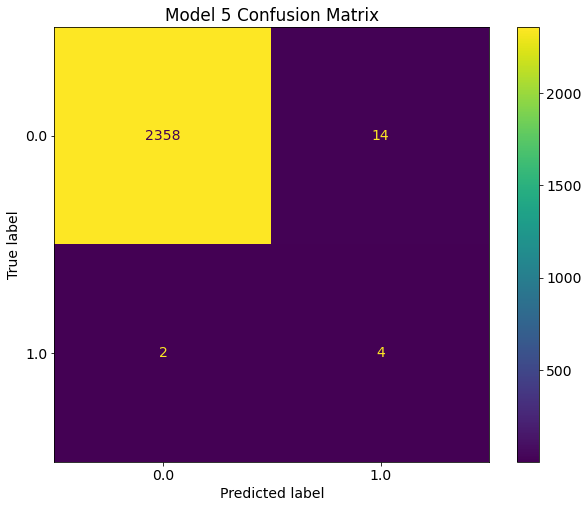

In [578]:
#Print scores from model #5
print(final_pipe5.score(X_train,y_train))
print(final_pipe5.score(X_test,y_test))

#plot confusion matrix 
fig, ax = plt.subplots(figsize = (10, 8))
plt.rcParams.update({'font.size': 14})
ax.set_title('Model 5 Confusion Matrix')
plot_confusion_matrix(final_pipe5, X_test, y_test, ax=ax);

In [579]:
model5_recall = recall_score(y_test, ypred5)
model5_recall

print('Model 5 Recall Score:', model5_recall)

Model 5 Recall Score: 0.6666666666666666


In [580]:
print(classification_report(y_test, ypred5, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.22      0.67      0.33         6
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.22      0.67      0.33         6
   macro avg       0.07      0.22      0.11         6
weighted avg       0.22      0.67      0.33         6



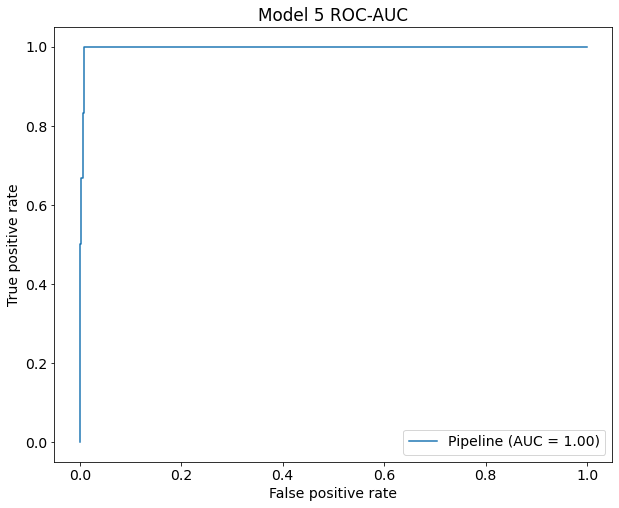

In [581]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(final_pipe5, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 5 ROC-AUC')
plt.show()

# Model 6 - XGBoost with Undersampling

In [582]:
# Create new pipeline for Random Forest
final_pipe6 = Pipeline([('preprocess', ct),
                        ('under', RandomUnderSampler(sampling_strategy='majority', random_state=42)), #Use for imbalance purposes
                       #(('smote', SMOTE(sampling_strategy='minority', random_state = 42))),      #Use for imbalance purposes
                       #('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('xgb', XGBClassifier(random_state = 42))])


In [585]:
# Performing a grid search for our XGBoost
xgb_params = {
    'xgb__gamma': [0.5, 1, 5],
    'xgb__learning_rate': [0.1, 0.2],
    'xgb__max_depth': [3, 5, 7],
    'xgb__min_child_weight': [1, 5, 10],
    'xgb__n_estimators': [50, 100, 150, 200],
}

xgb_grid = GridSearchCV(estimator = final_pipe6, param_grid = xgb_params, scoring = 'recall', cv = 5)

In [586]:
# Fitting the training data
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('ohepipe',
                                                                         Pipeline(steps=[('onehotenc',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False)),
                                                                                         ('onehotnorm',
                                                                                          MaxAbsScaler())]),
                                                                         ['team']),
                                                                        ('numpipe',
                                                                         Pipeline(steps=[('numnorm',
                    

In [587]:
# Looking at the best parameters as a result of the grid search
xgb_grid.best_params_

{'xgb__gamma': 0.5,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 3,
 'xgb__min_child_weight': 1,
 'xgb__n_estimators': 50}

In [590]:
# Create new pipeline for XGBoost
final_pipe6 = Pipeline([('preprocess', ct),
                        ('under', RandomUnderSampler(sampling_strategy='majority', random_state=42)), #Use for imbalance purposes
                       #(('smote', SMOTE(sampling_strategy='minority', random_state = 42))),      #Use for imbalance purposes
                       #('over', RandomOverSampler(sampling_strategy='minority')),    #Use for imbalance purposes
                      ('xgb', XGBClassifier(random_state = 42,gamma = 0.5,
                                                     learning_rate = 0.1,
                                                     max_depth = 3,
                                                     min_child_weight = 1,
                                                     n_estimators = 50))])


In [591]:
# Fitting the training data with the updated pipeline
final_pipe6.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ohepipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['team']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['season', 'poss', 'mp', 'raptor_box_offense', 'raptor_box_defense',
       'raptor_box_total', 'raptor_onoff_off...
        

In [592]:
# Calculating y predictions
ypred6 = final_pipe6.predict(X_test)

0.8815244407622204
0.8885618166526493


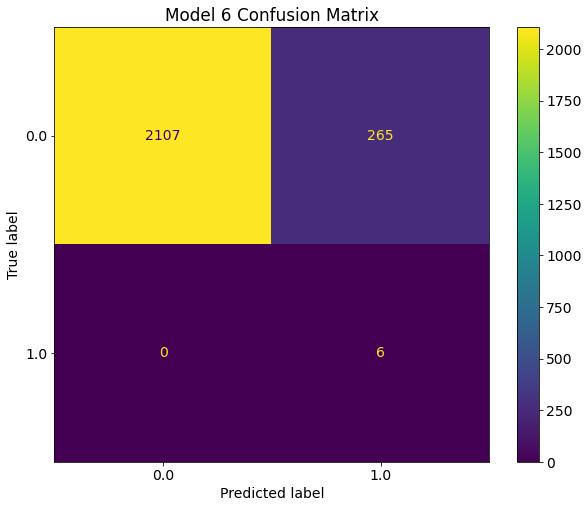

In [594]:
#Print scores from model #6
print(final_pipe6.score(X_train,y_train))
print(final_pipe6.score(X_test,y_test))

#plot confusion matrix 
fig, ax = plt.subplots(figsize = (10, 8))
plt.rcParams.update({'font.size': 14})
ax.set_title('Model 6 Confusion Matrix')
plot_confusion_matrix(final_pipe6, X_test, y_test, ax=ax);

In [593]:
# Calculating recall score for the test set
model6_recall = recall_score(y_test, ypred6)
model6_recall

print('Model 6 Recall Score:', model6_recall)

Model 6 Recall Score: 1.0


In [596]:
print(classification_report(y_test, ypred6, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.02      1.00      0.04         6
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.02      1.00      0.04         6
   macro avg       0.01      0.33      0.01         6
weighted avg       0.02      1.00      0.04         6



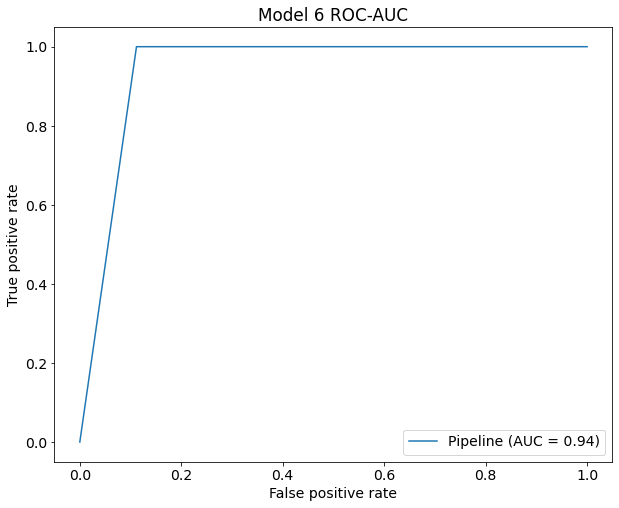

In [597]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(final_pipe6, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 6 ROC-AUC')
plt.show()

# Model 7 - Gaussian Naive Bayes

In [603]:
# Create new pipeline for Random Forest
final_pipe7 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority', random_state=42)), #Use for imbalance purposes
                       #(('smote', SMOTE(sampling_strategy='minority', random_state = 42))),      #Use for imbalance purposes
                       ('over', RandomOverSampler(sampling_strategy='minority', random_state=42)),    #Use for imbalance purposes
                      ('nb', GaussianNB())])


0.8365782932891467
0.8494533221194281


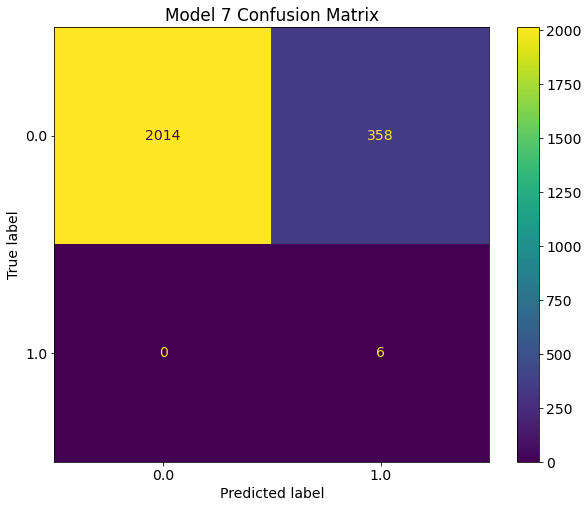

In [605]:
#Fit the model
final_pipe7.fit(X_train,y_train)

#Print scores from model
print(final_pipe7.score(X_train,y_train))
print(final_pipe7.score(X_test,y_test))

#Predict model #7
ypred7 = final_pipe7.predict(X_test)

#plot confusion matrix 
fig, ax = plt.subplots(figsize = (10, 8))
plt.rcParams.update({'font.size': 14})
ax.set_title('Model 7 Confusion Matrix')
plot_confusion_matrix(final_pipe7, X_test, y_test, ax=ax);

In [606]:
model7_recall = recall_score(y_test, ypred7)
model7_recall

print('Model 7 Recall Score:', model7_recall)

Model 7 Recall Score: 1.0


In [608]:
print(classification_report(y_test, ypred7, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.02      1.00      0.03         6
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.02      1.00      0.03         6
   macro avg       0.01      0.33      0.01         6
weighted avg       0.02      1.00      0.03         6



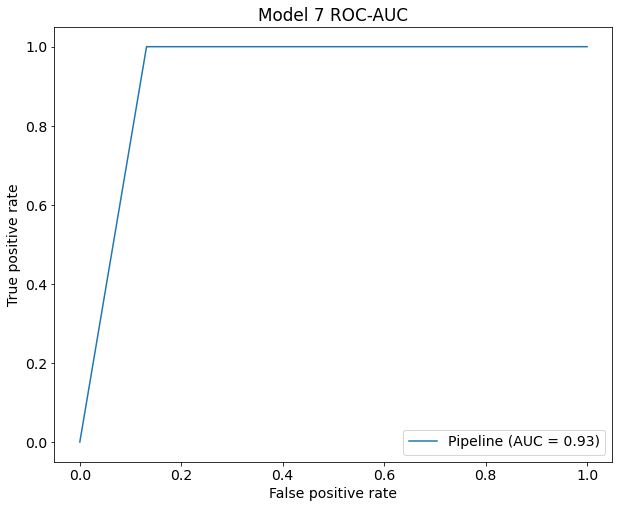

In [609]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(final_pipe7, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 7 ROC-AUC')
plt.show()

# Model 8 - Logistic Regression with hyperperameter tuning

In [243]:
# Instantiate final pipe 
final_pipe8 = Pipeline([('preprocess', ct),
                        #('under', RandomUnderSampler(sampling_strategy='majority')), #Use for imbalance purposes
                        ('over', RandomOverSampler()),
                        ('smote', SMOTE()),
                        #Use for imbalance purposes
                           #Use for imbalance purposes
                      ('model', LogisticRegression(random_state = 42,
                                                   C=1e3,             # Smaller values -> more regularization
                                                   max_iter=1e3,      # Ensure we eventually reach a solution
                                                   solver='lbfgs',    # (Default) Can optimize depending on problem
                                                   multi_class='ovr'  # (Default) Will try to do multiclass classification 
))])


1.0
0.9966965549787635


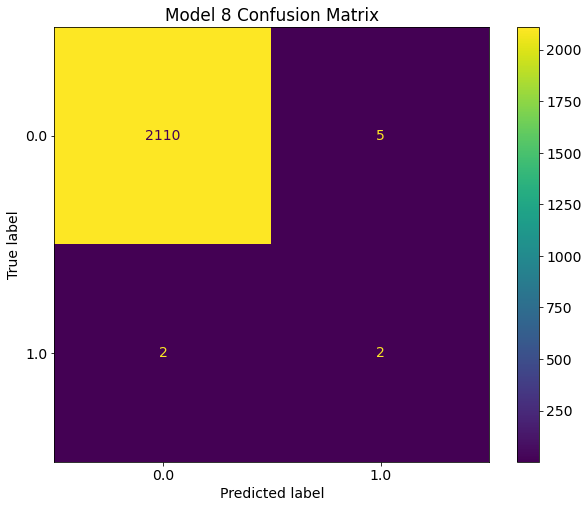

In [244]:
# Fit the model
final_pipe8.fit(X_train,y_train)

#Print scores from model
print(final_pipe8.score(X_train,y_train))
print(final_pipe8.score(X_test,y_test))

#Predict first model
ypred8 = final_pipe8.predict(X_test)

# #plot confusion matrix 
fig, ax = plt.subplots(figsize = (10, 8))
plt.rcParams.update({'font.size': 14})
ax.set_title('Model 8 Confusion Matrix')
plot_confusion_matrix(final_pipe8, X_test, y_test, ax=ax);

In [245]:
model8_accuracy = accuracy_score(y_test, ypred8)
model8_accuracy

print('Model 3 Accuracy Score:', model8_accuracy)

Model 3 Accuracy Score: 0.9966965549787635


In [246]:
print(classification_report(y_test, ypred8, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.29      0.50      0.36         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.29      0.50      0.36         4
   macro avg       0.10      0.17      0.12         4
weighted avg       0.29      0.50      0.36         4



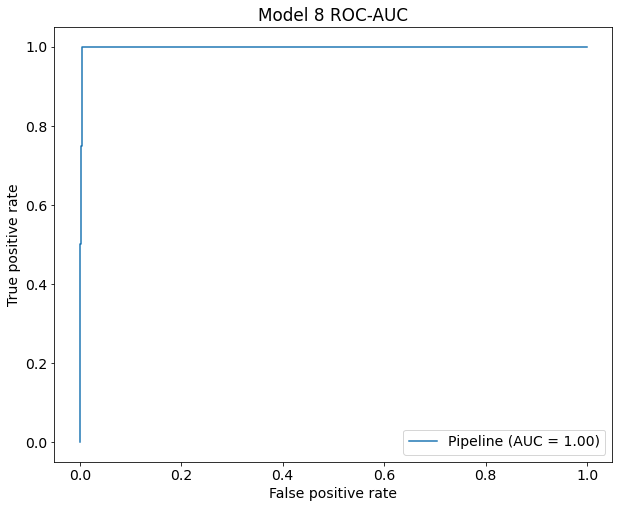

In [247]:
# Visualizing the AUC (Area Under the Curve)
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(final_pipe8, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Model 8 ROC-AUC')
plt.show()

In [249]:
X_train.columns

Index(['player_name', 'season', 'season_type', 'team', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact', 'pts', 'ast',
       'reb', 'wins', 'total_games', 'win_pct', 'year'],
      dtype='object')

In [250]:
test_df.columns

Index(['index', 'player_name', 'season', 'season_type', 'team', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact', 'pts', 'ast',
       'reb', 'wins', 'total_games', 'win_pct', 'year', 'predict_probas'],
      dtype='object')

In [248]:
# Get probability predictions for y data and test data 
yproba8 = final_pipe8.predict_proba(X_test)

testproba8 = final_pipe8.predict_proba(test_df)

ValueError: Column ordering must be equal for fit and for transform when using the remainder keyword

In [2077]:
import pickle
with open("finalpipe1.pkl", "wb") as f:
    pickle.dump(final_pipe1, f)